In [1]:
from __future__ import print_function
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sys
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [2]:
batch_size = 128
num_class = 10
epoch = 25

r,c = 28,28
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_test_test = x_test.copy()

In [3]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0],1, r,c)
    x_test = x_test.reshape(x_test.reshape[0],1,r,c)
    ip = (1,r,c)
else:
    x_train = x_train.reshape(x_train.shape[0], r,c,1)
    x_test = x_test.reshape(x_test.shape[0], r,c,1)
    ip = (r,c,1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train.shape[0]',x_train.shape[0])
print('x_test.shape[0]',x_test.shape[0])
print('x_train',x_train.shape)
print('y_train',y_train.shape)

x_train.shape[0] 60000
x_test.shape[0] 10000
x_train (60000, 28, 28, 1)
y_train (60000,)


In [5]:
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [6]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [7]:
m = Sequential()
m.add(Conv2D(32,kernel_size=(3,3),input_shape=ip))
m.add(LeakyReLU(alpha=0.001))
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(BatchNormalization())

m.add(Conv2D(64,kernel_size=(3,3)))
m.add(LeakyReLU(alpha=0.001))
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(BatchNormalization())

m.add(Conv2D(128,kernel_size=(3,3)))
m.add(LeakyReLU(alpha=0.001))
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(BatchNormalization())

m.add(Flatten())
m.add(Dense(1024))
m.add(BatchNormalization())
m.add(LeakyReLU(alpha=0.001))
m.add(Dropout(0.50))

m.add(Dense(128))
m.add(BatchNormalization())
m.add(LeakyReLU(alpha=0.001))
m.add(Dropout(0.25))

m.add(Dense(num_class,activation='softmax'))

In [8]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

In [9]:
m.compile(loss=keras.losses.categorical_crossentropy,
         optimizer=keras.optimizers.Adam(),
         metrics=['accuracy'])

his = m.fit(x_train,y_train,
     batch_size=batch_size,
     epochs=10,
     verbose=1,
     validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.1738 - accuracy: 0.9491 - val_loss: 0.4399 - val_accuracy: 0.8596
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0612 - accuracy: 0.9815 - val_loss: 0.0509 - val_accuracy: 0.9842
Epoch 3/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0456 - accuracy: 0.9863 - val_loss: 0.0533 - val_accuracy: 0.9843
Epoch 4/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0436 - val_accuracy: 0.9874
Epoch 5/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0404 - val_accuracy: 0.9880
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0521 - val_accuracy: 0.9852
Epoch 7/10
60000/60000 [==============================] - 7s 

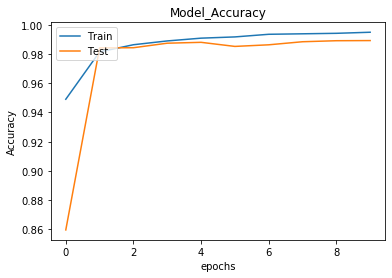

In [10]:
plt.plot(his.history["accuracy"])
plt.plot(his.history["val_accuracy"])
plt.title("Model_Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend(['Train',"Test"],loc="upper left")
plt.show()

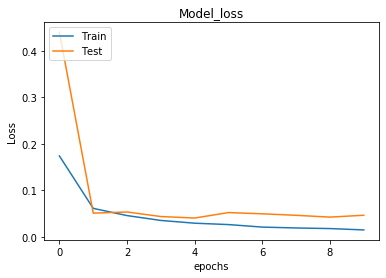

In [11]:
plt.plot(his.history["loss"])
plt.plot(his.history["val_loss"])
plt.title("Model_loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend(['Train',"Test"],loc="upper left")
plt.show()

In [12]:
score = m.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:',score[1])

Test loss: 0.04634356189837417
Test accuracy: 0.9891999959945679


In [13]:
y_pred = m.predict(x_test)
y_pred_one_hot = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)

In [14]:
cofm = confusion_matrix(y_true=y_true, y_pred=y_pred_one_hot)
print(cofm)

[[ 975    1    1    0    0    1    1    1    0    0]
 [   0 1130    0    0    2    0    1    2    0    0]
 [   2    0 1016    4    1    0    0    9    0    0]
 [   0    0    2 1004    0    2    0    2    0    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   2    1    1    4    0  880    2    1    1    0]
 [   3    3    0    0    0    3  949    0    0    0]
 [   0    2    6    0    0    0    0 1020    0    0]
 [   2    0    6    1    5    2    0    4  945    9]
 [   1    0    0    0    6    2    0    4    0  996]]


In [15]:
clr = classification_report(y_true=y_true,y_pred=y_pred_one_hot)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [16]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_one_hot).numpy()
print(con_mat)

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.cast` instead.
[[ 975    1    1    0    0    1    1    1    0    0]
 [   0 1130    0    0    2    0    1    2    0    0]
 [   2    0 1016    4    1    0    0    9    0    0]
 [   0    0    2 1004    0    2    0    2    0    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   2    1    1    4    0  880    2    1    1    0]
 [   3    3    0    0    0    3  949    0    0    0]
 [   0    2    6    0    0    0    0 1020    0    0]
 [   2    0    6    1    5    2    0    4  945    9]
 [   1    0    0    0    6    2    0    4    0  996]]


In [17]:
cf_mx_norm = np.around(con_mat.astype("float")/con_mat.sum(axis=1)[:,np.newaxis],decimals=2)

In [18]:
print(cf_mx_norm)

[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.98 0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.99 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.   0.01 0.   0.   0.   0.   0.99 0.   0.  ]
 [0.   0.   0.01 0.   0.01 0.   0.   0.   0.97 0.01]
 [0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.99]]


In [19]:
class_num = ['0','1','2','3','4','5','6','7','8','9']
cf_mx_norm_df = pd.DataFrame(cf_mx_norm, index=class_num, columns=class_num)

In [20]:
cf_mx_norm_df

,0,1,2,3,4,5,6,7,8,9
0,0.99,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.0,0.98,0.00,0.00,0.00,0.00,0.01,0.00,0.00
3,0.00,0.0,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.0,0.00,0.00,0.99,0.00,0.00,0.00,0.00,0.00
5,0.00,0.0,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.00
6,0.00,0.0,0.00,0.00,0.00,0.00,0.99,0.00,0.00,0.00
7,0.00,0.0,0.01,0.00,0.00,0.00,0.00,0.99,0.00,0.00
8,0.00,0.0,0.01,0.00,0.01,0.00,0.00,0.00,0.97,0.01
9,0.00,0.0,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.99


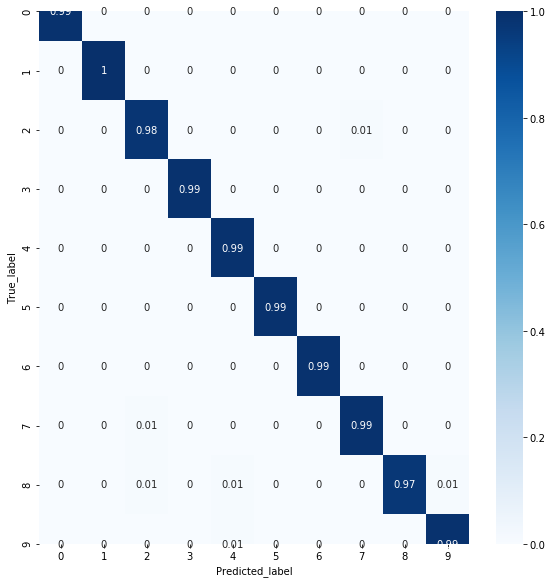

In [21]:
figure = plt.figure(figsize=(8,8))
sys.heatmap(cf_mx_norm_df,annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel("True_label")
plt.xlabel("Predicted_label")
plt.show()

10000/10000 [==============================] - 1s 78us/step


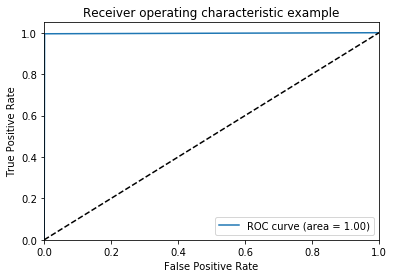

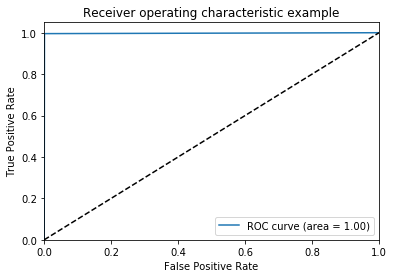

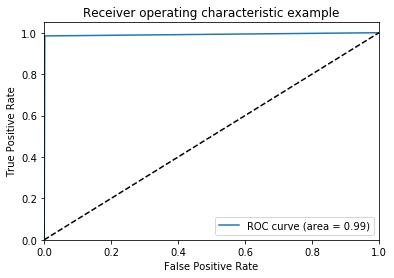

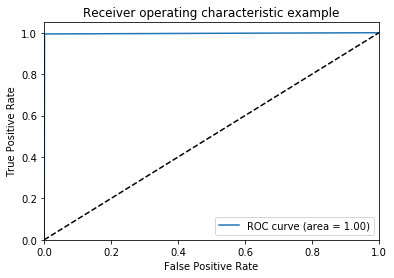

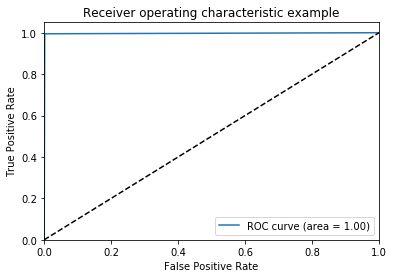

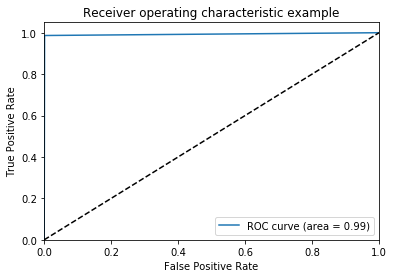

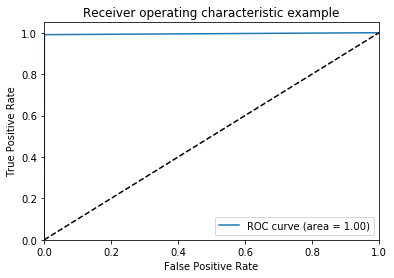

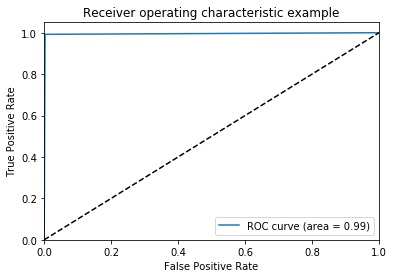

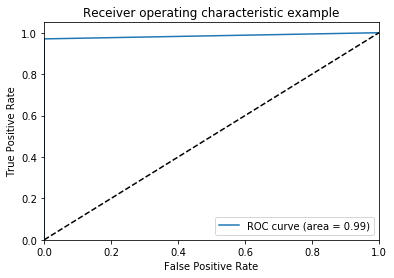

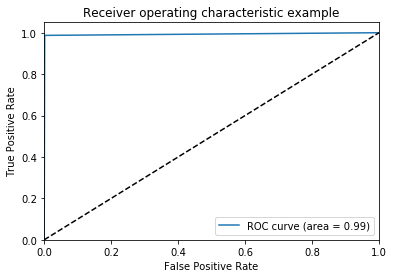

0.9939330858536847

In [22]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, all_labels,average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(all_labels): # all_labels: no of the labels
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        auc_score = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

    return roc_auc_score(y_test, y_pred, average=average)
y_pred = m.predict(x_test,verbose=True)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)
class_num = ['0','1','2','3','4','5','6','7','8','9']
multiclass_roc_auc_score(y_test,y_pred,class_num)    

In [23]:
def vis(img):
    layer_outputs = [layer.output for layer in m.layers[:12]] 
    activation_model = Model(inputs=m.input, outputs=layer_outputs) 

    layer_outputs = [layer.output for layer in m.layers[:12]] 
    activation_model = Model(inputs=m.input, outputs=layer_outputs) 
    act = activation_model.predict(img)
    layer_names = []
    for layer in m.layers[:12]:
        layer_names.append(layer.name) 

    images_per_row = 16
    
    for layer_name, layer_activation in zip(layer_names, act): 
        n_features = layer_activation.shape[-1] 
        size = layer_activation.shape[1] 
        n_cols = n_features // images_per_row 
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols): 
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                channel_image -= channel_image.mean() 
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        

C:\Users\Debanik Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Debanik Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


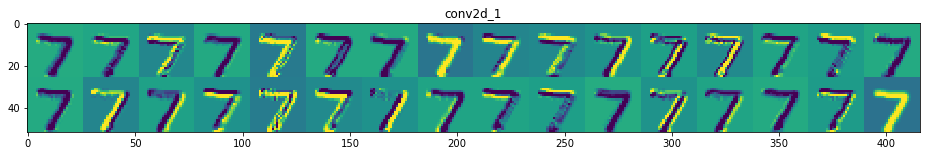

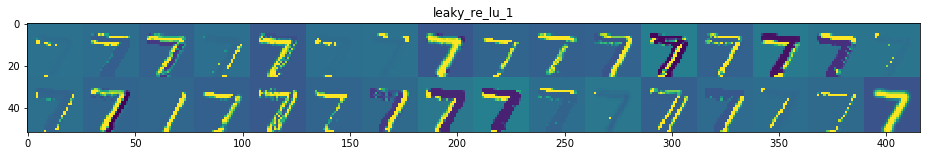

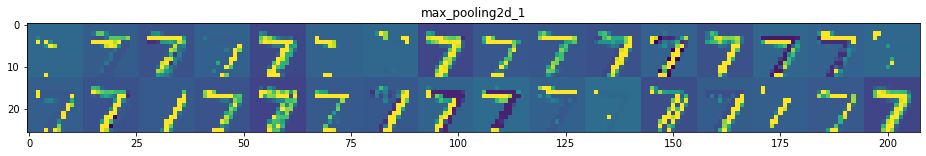

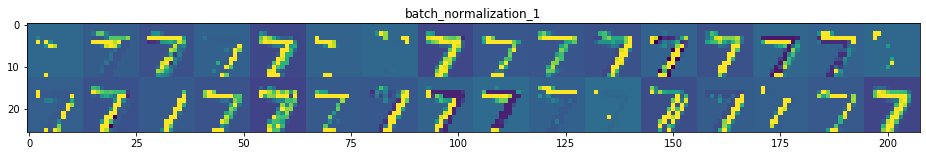

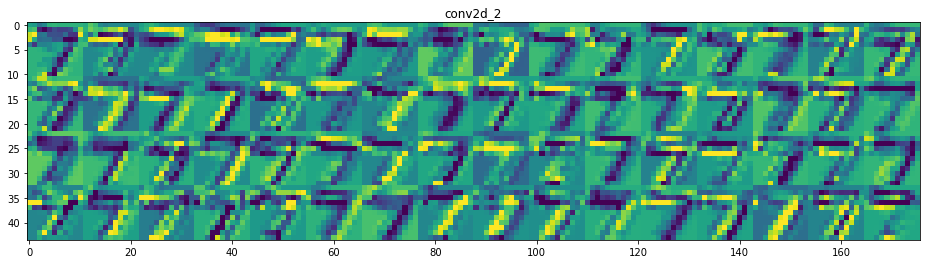

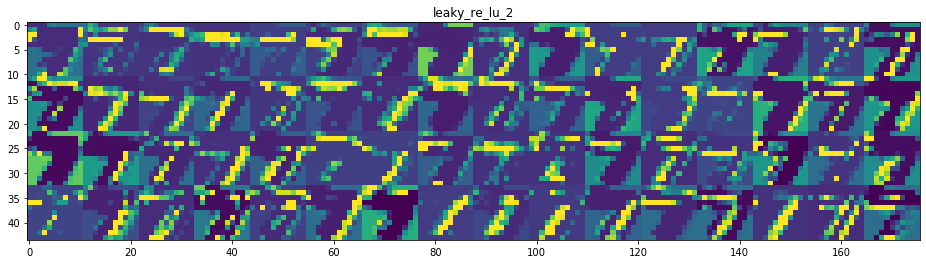

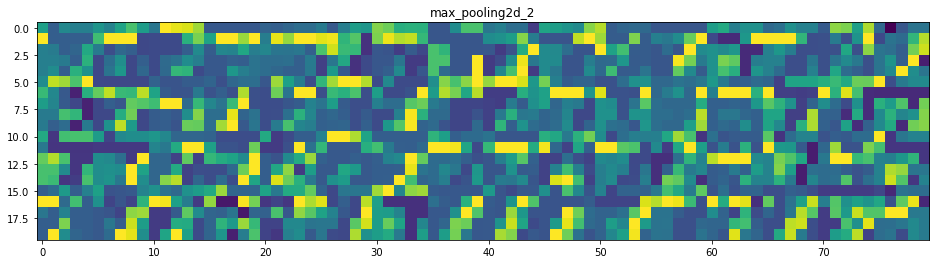

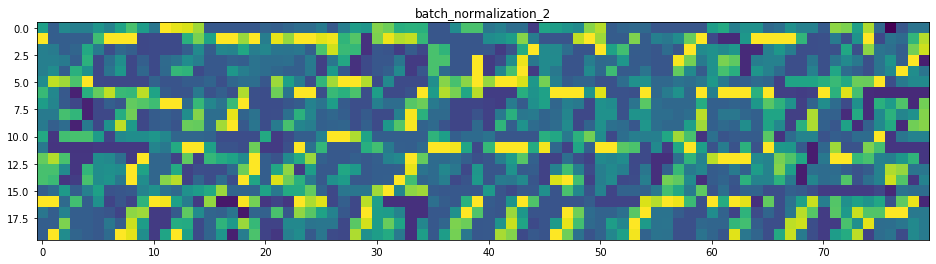

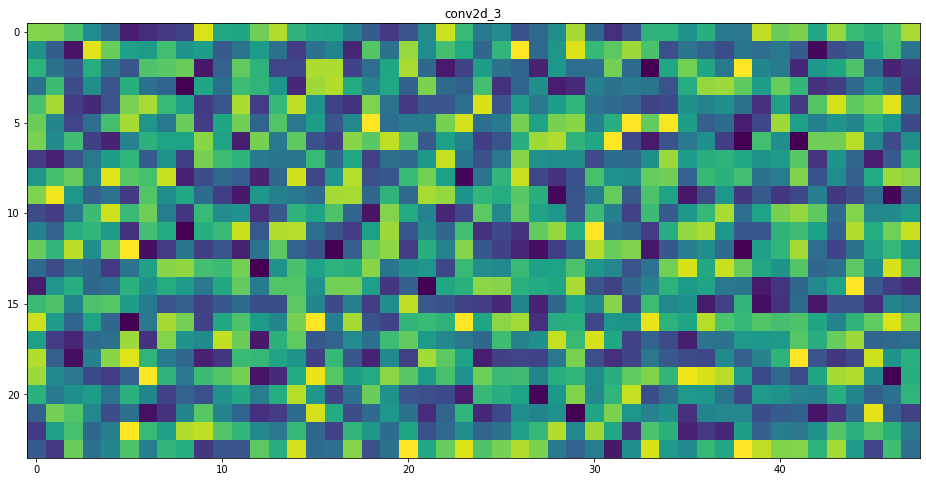

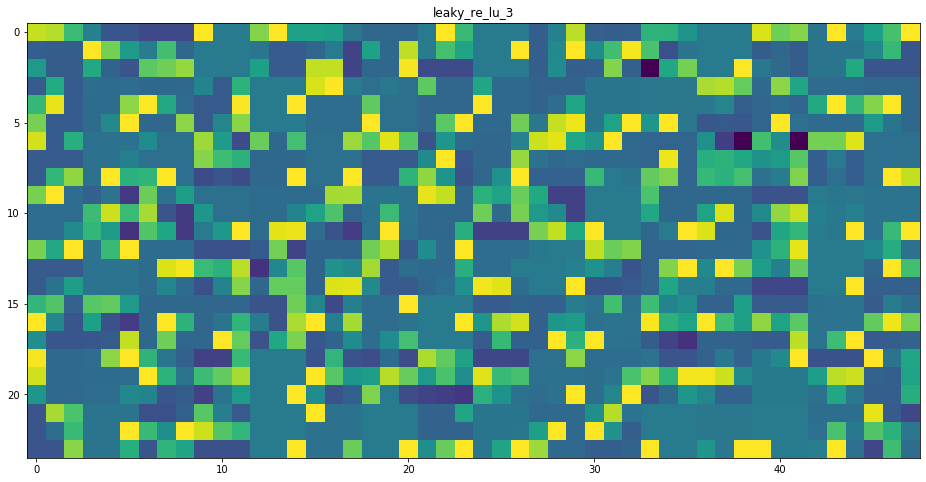

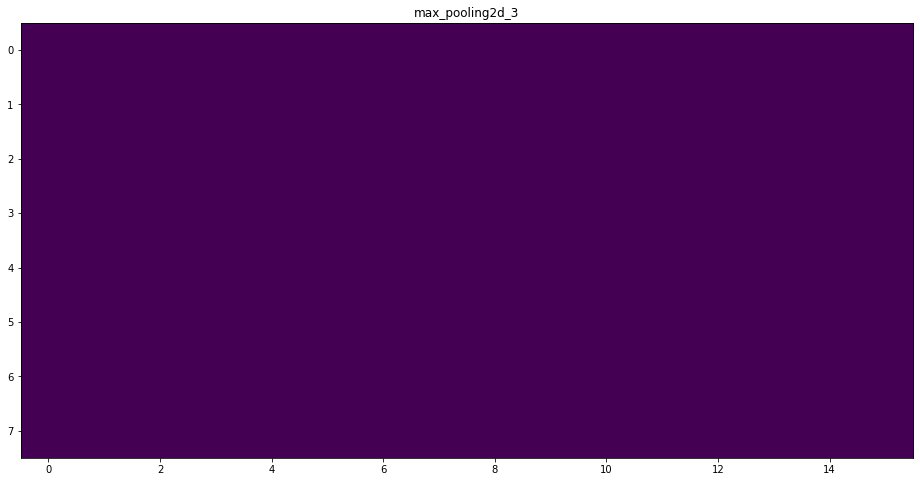

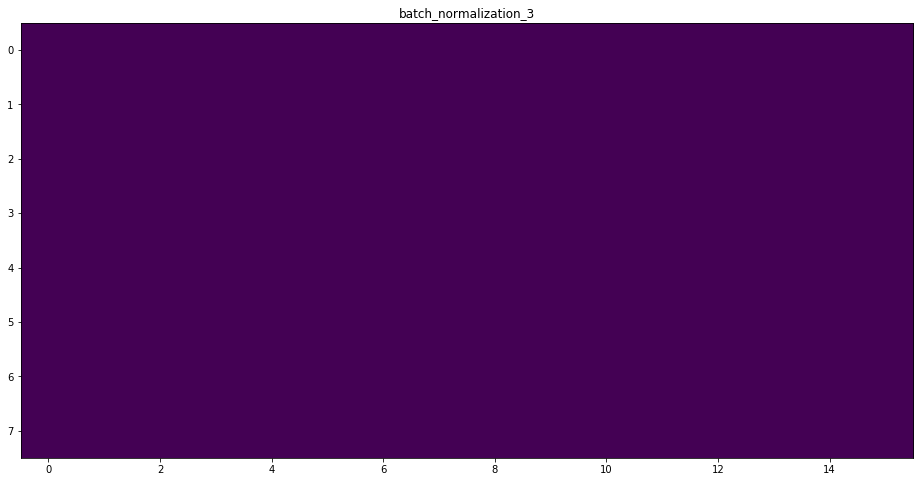

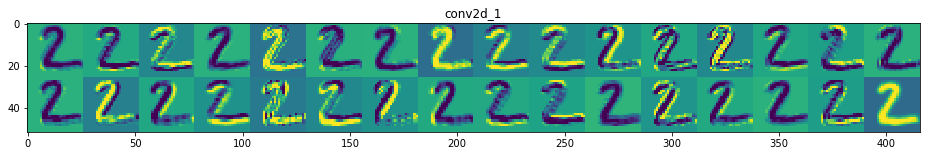

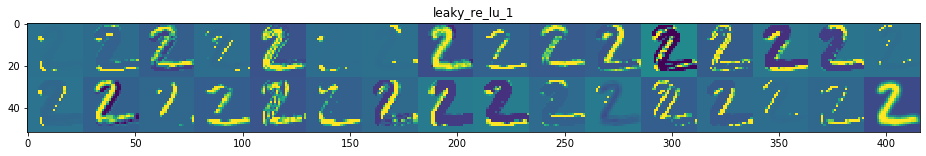

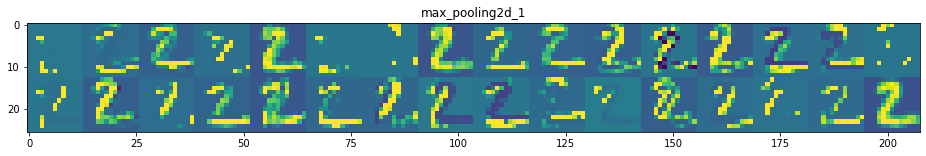

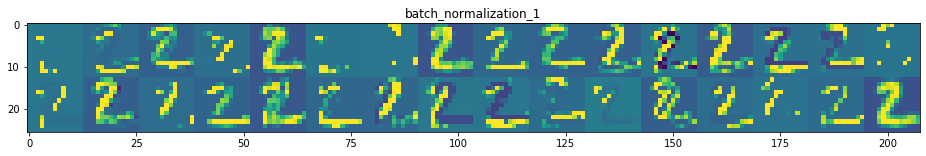

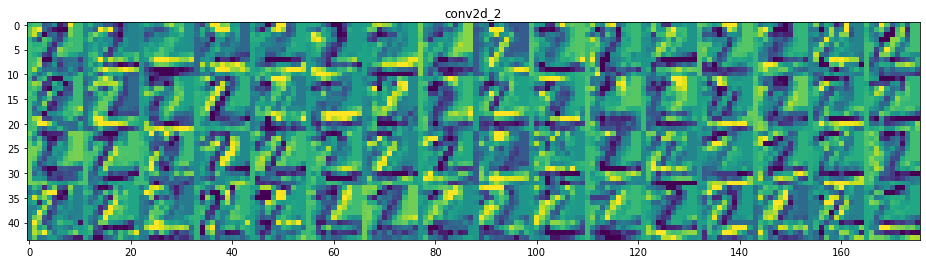

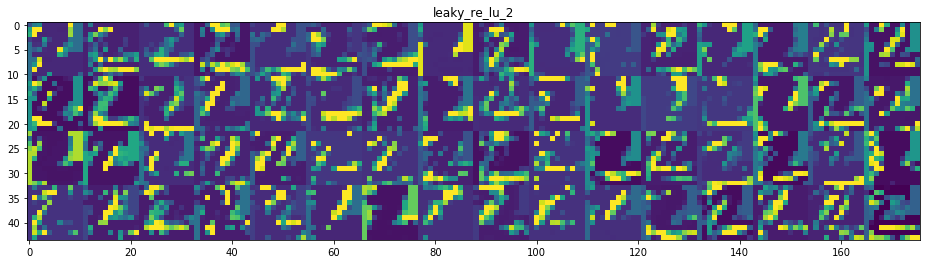

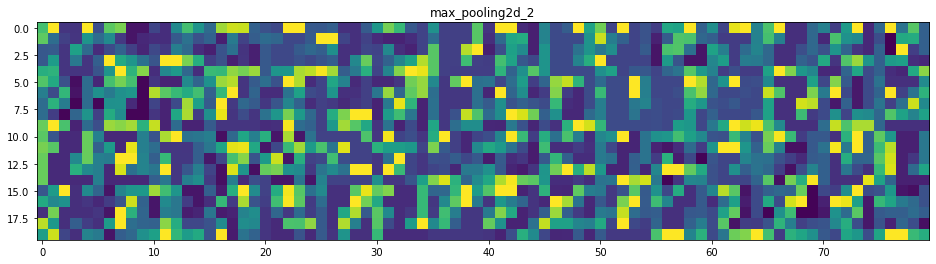

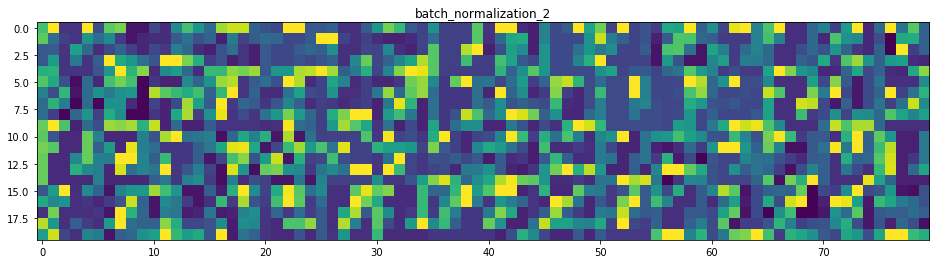

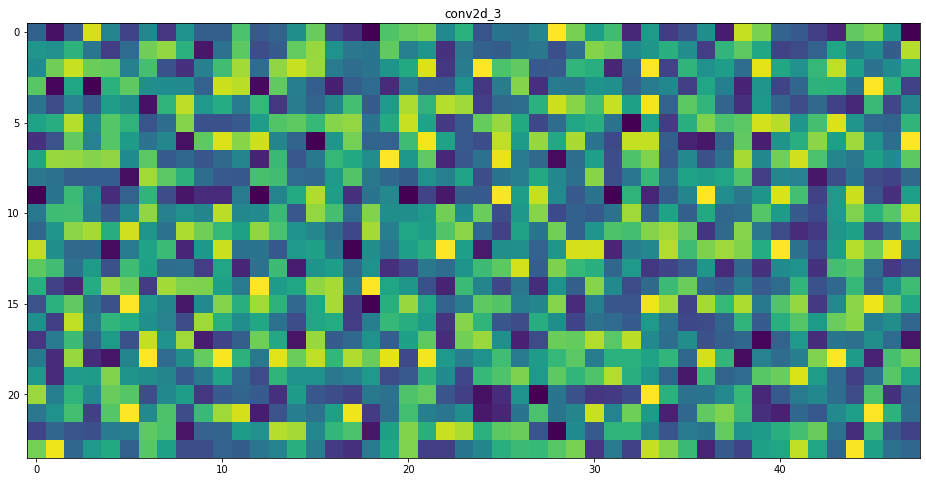

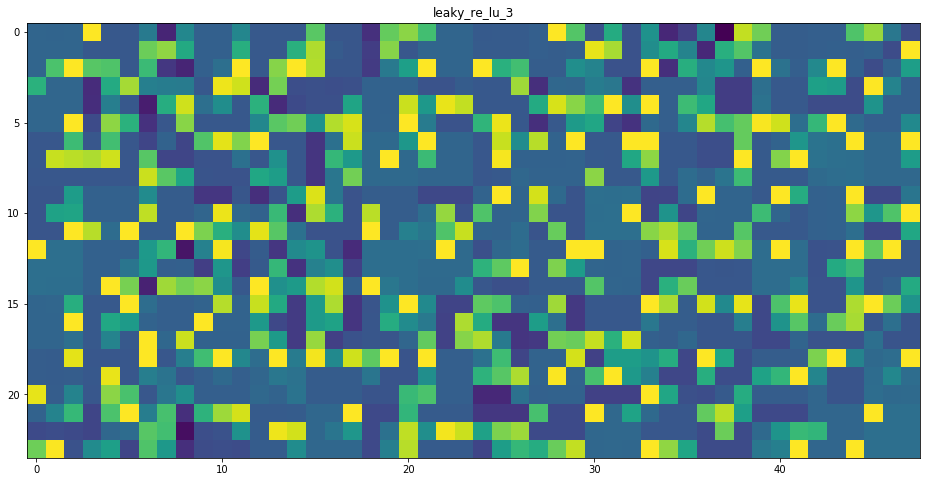

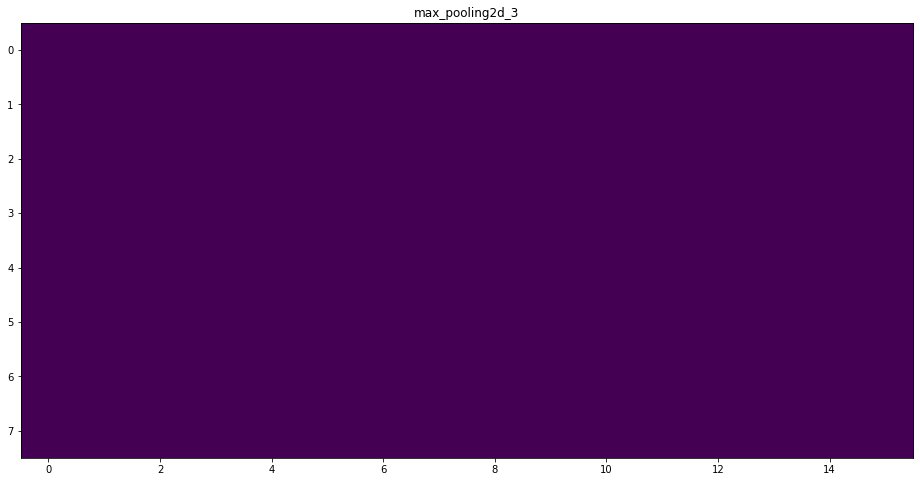

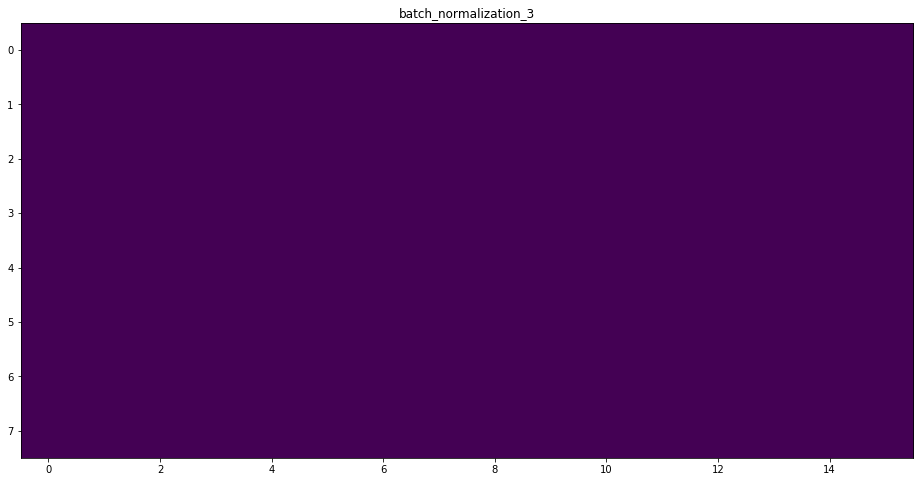

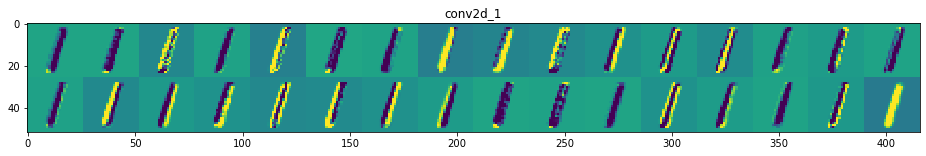

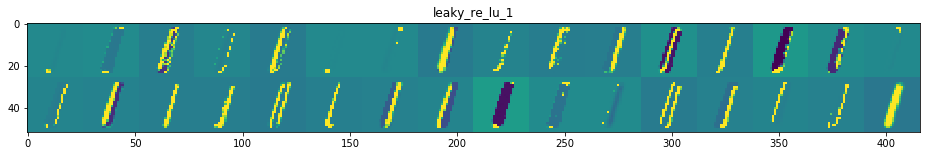

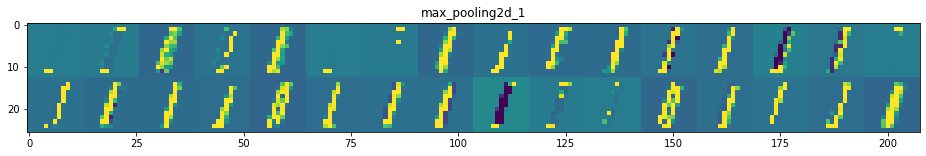

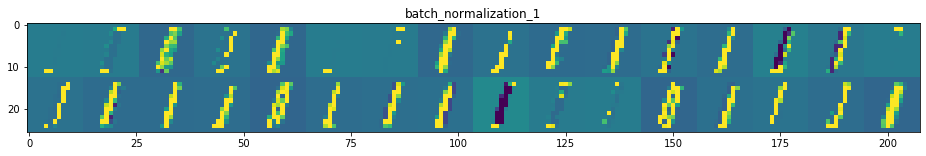

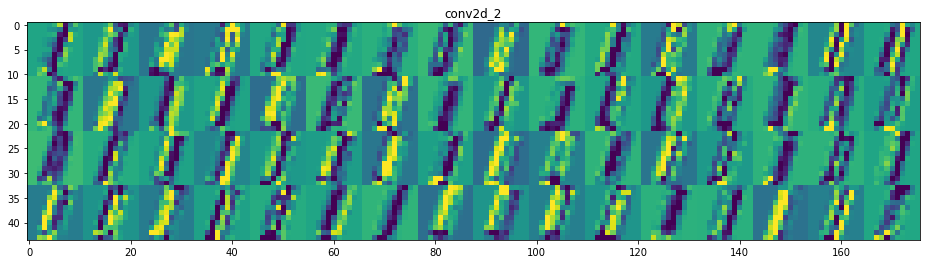

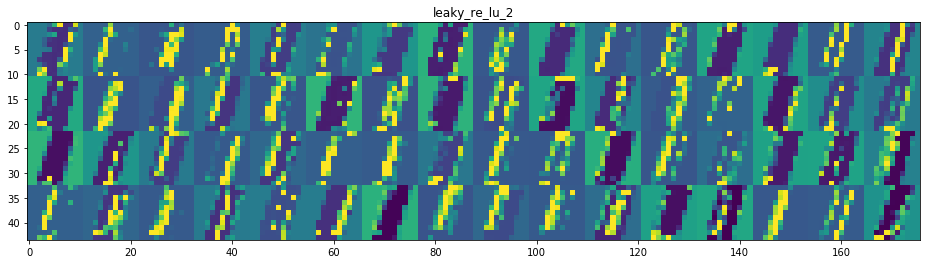

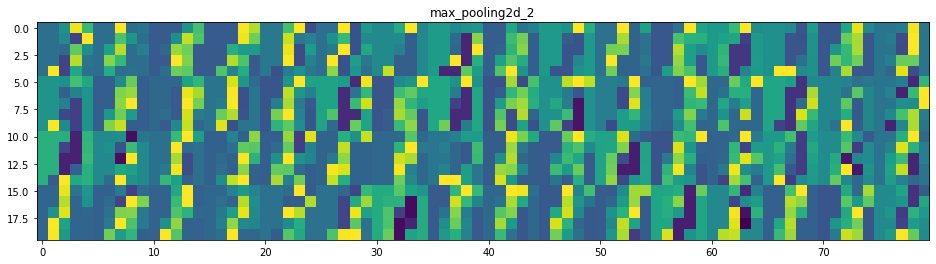

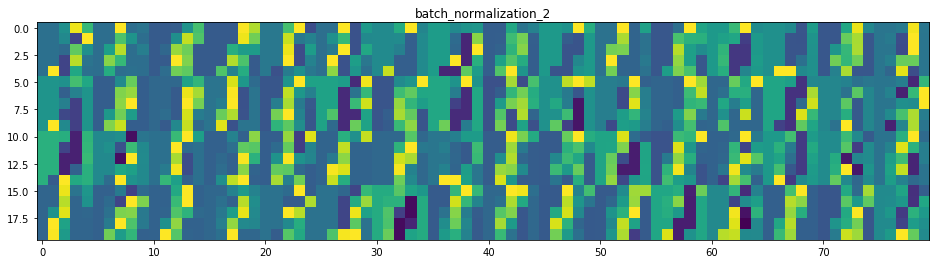

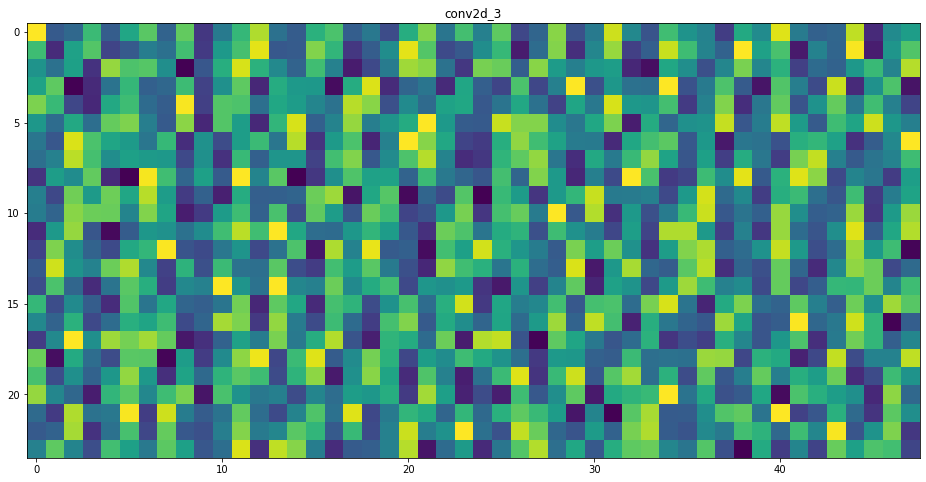

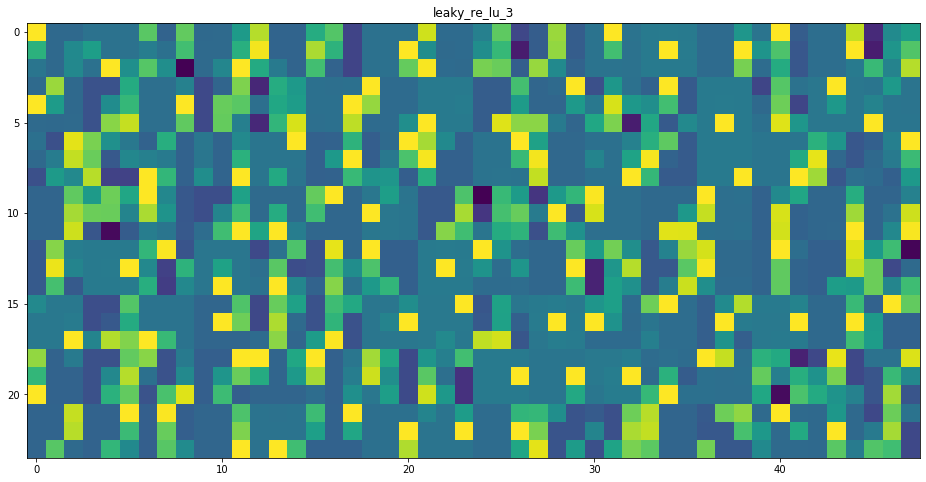

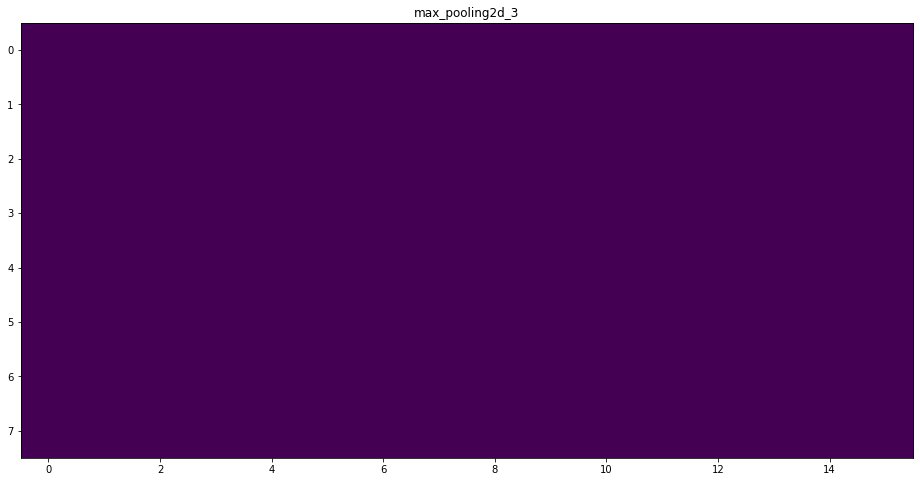

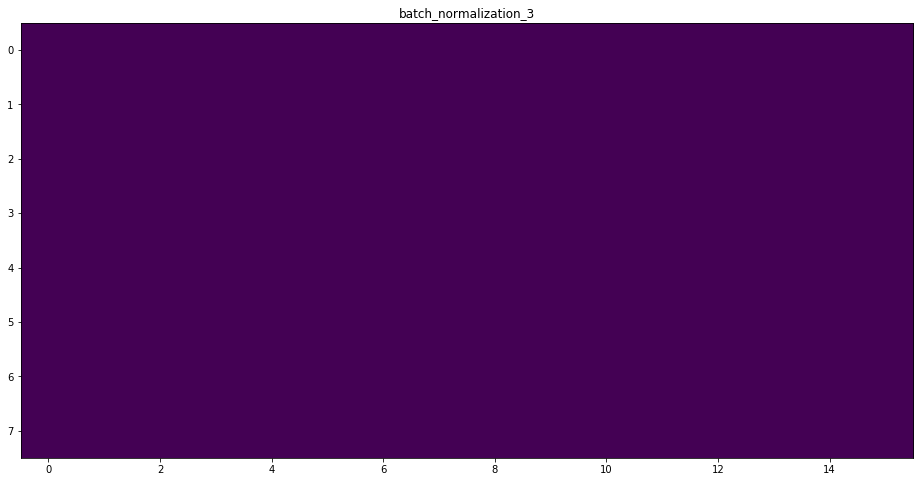

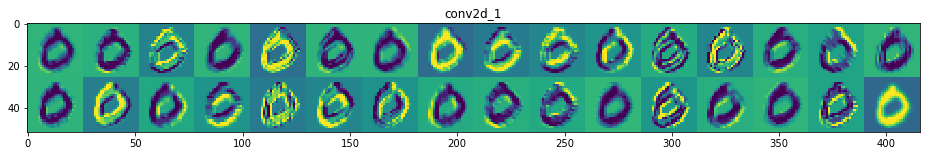

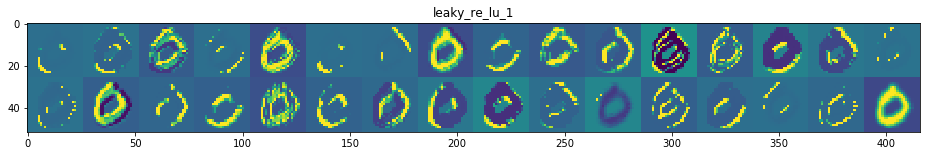

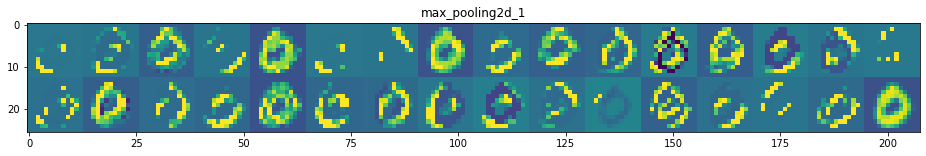

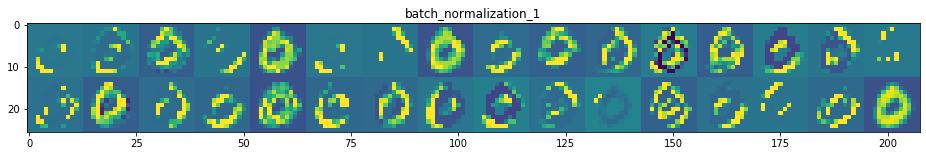

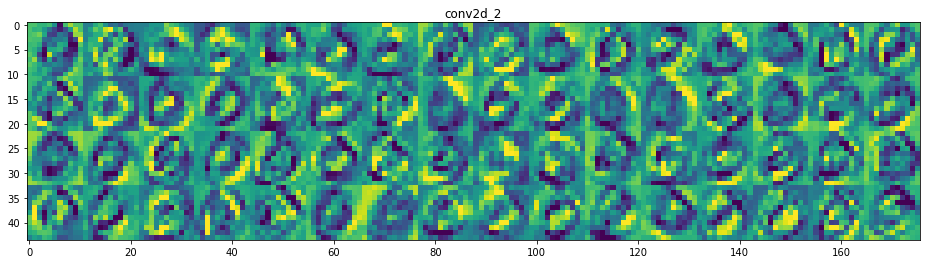

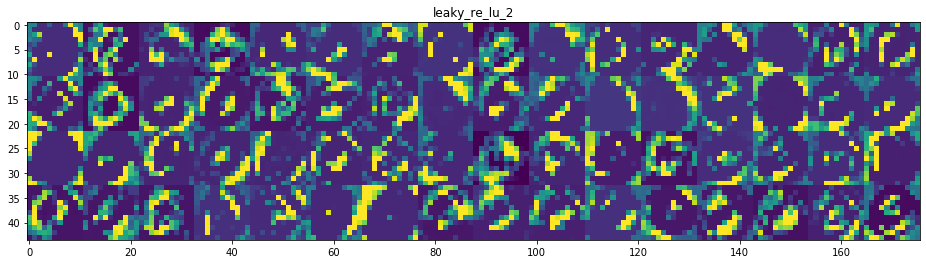

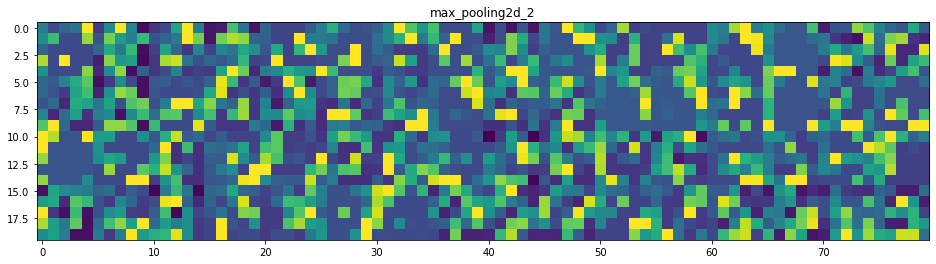

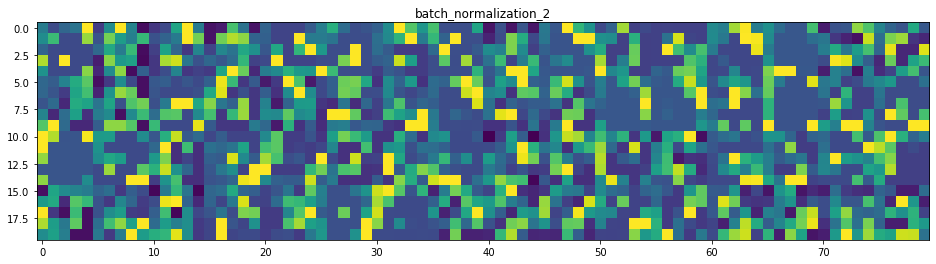

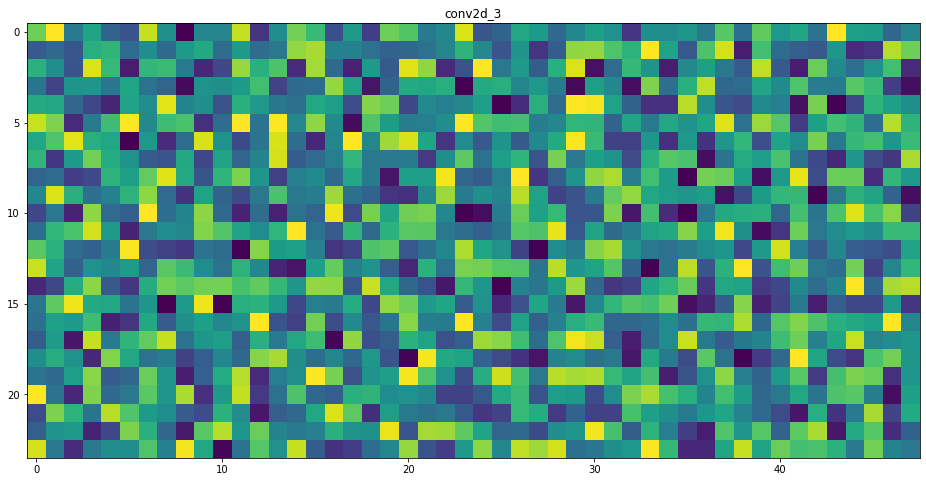

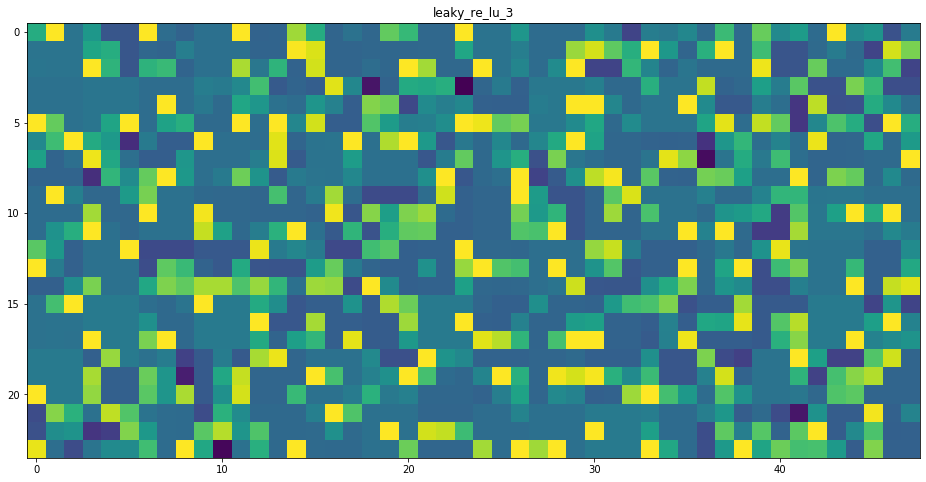

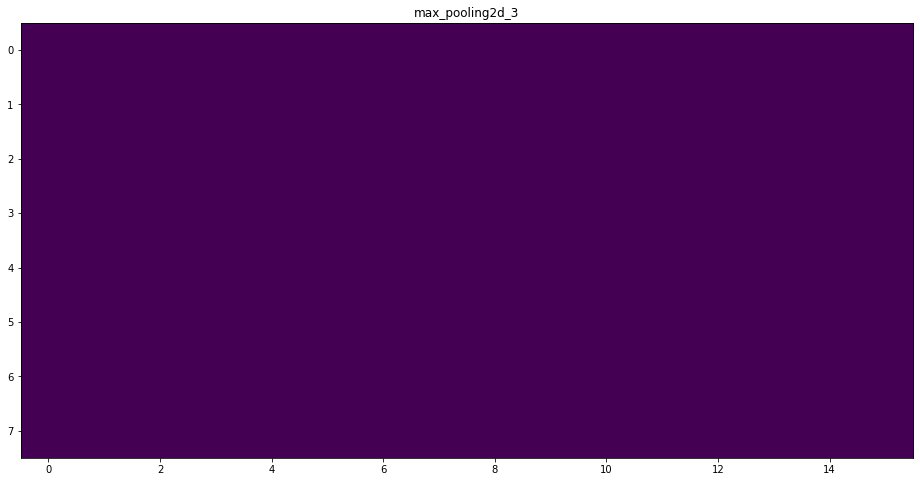

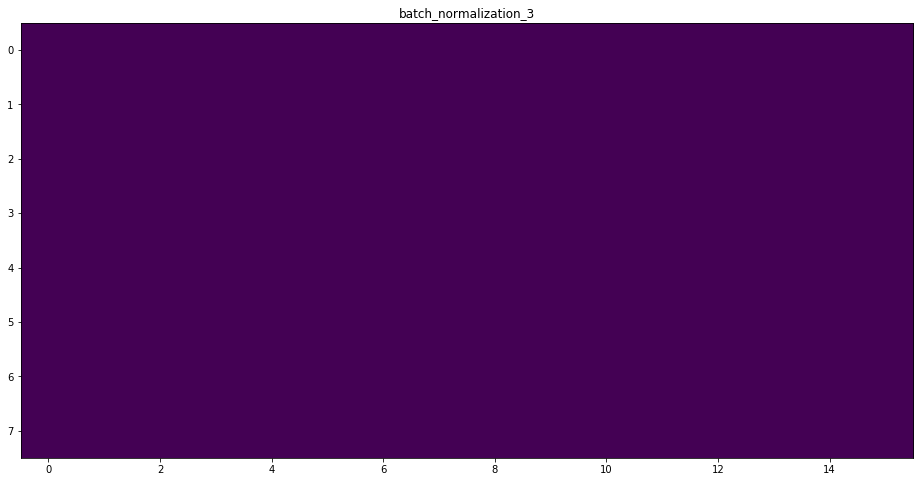

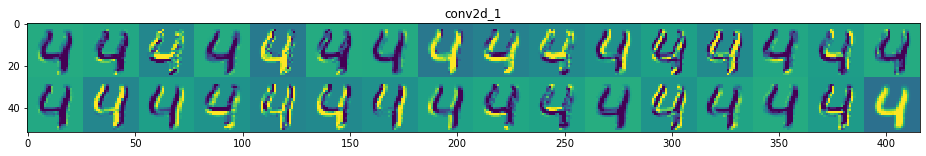

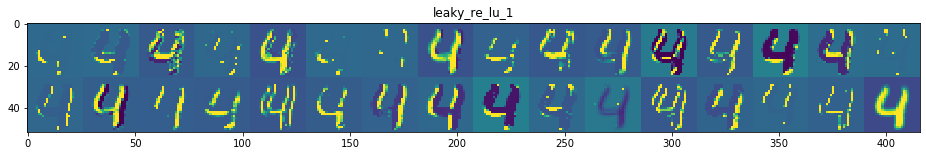

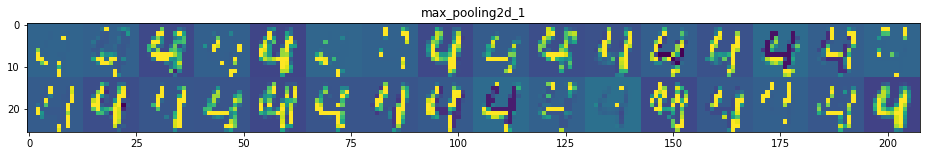

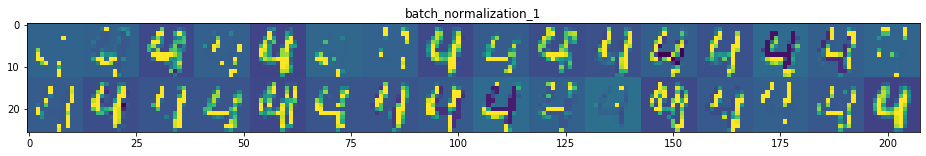

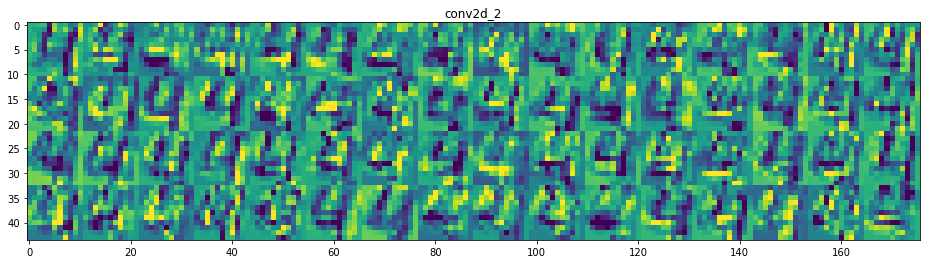

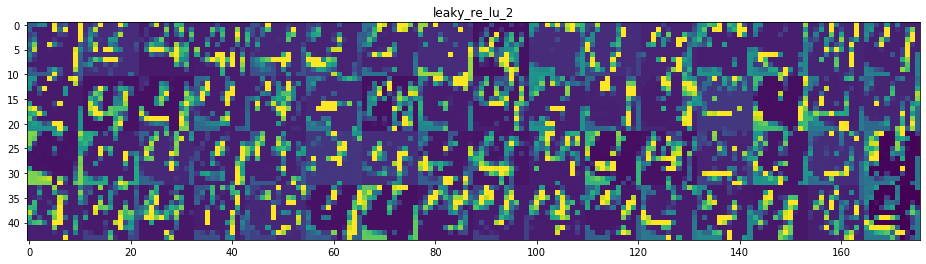

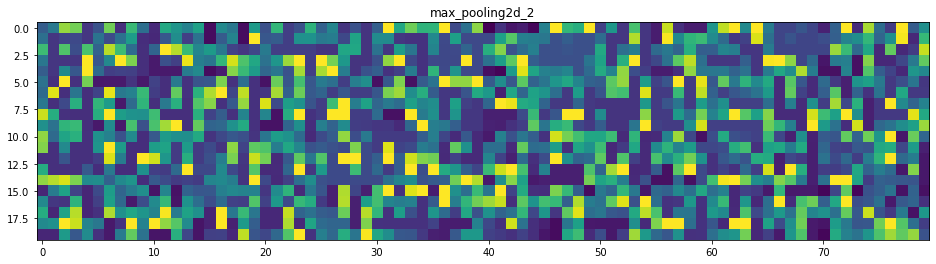

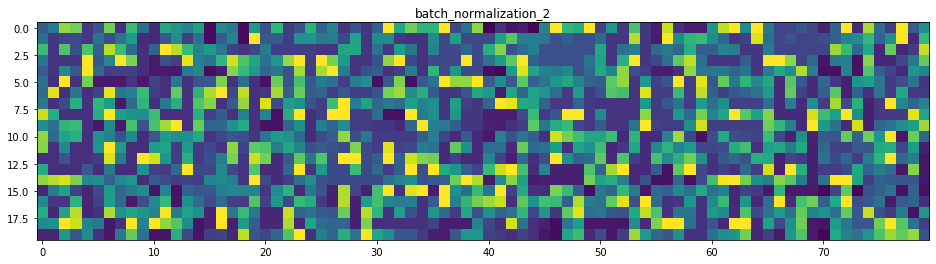

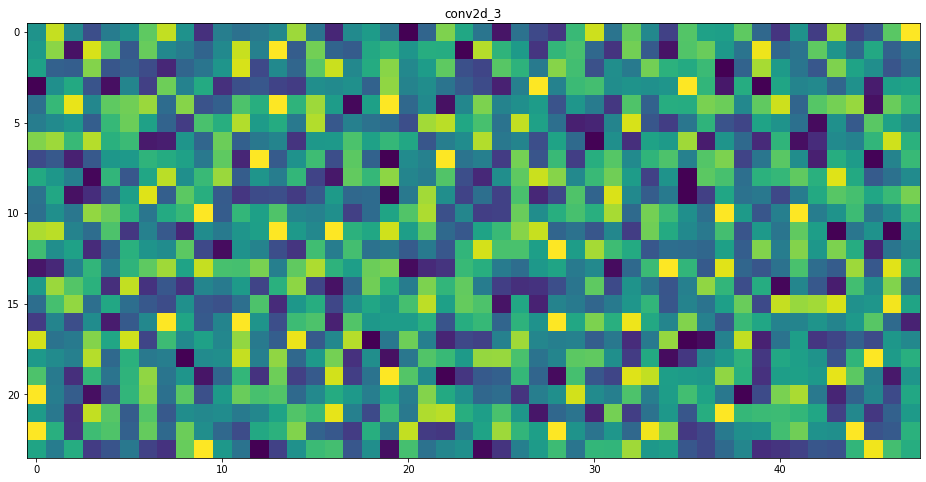

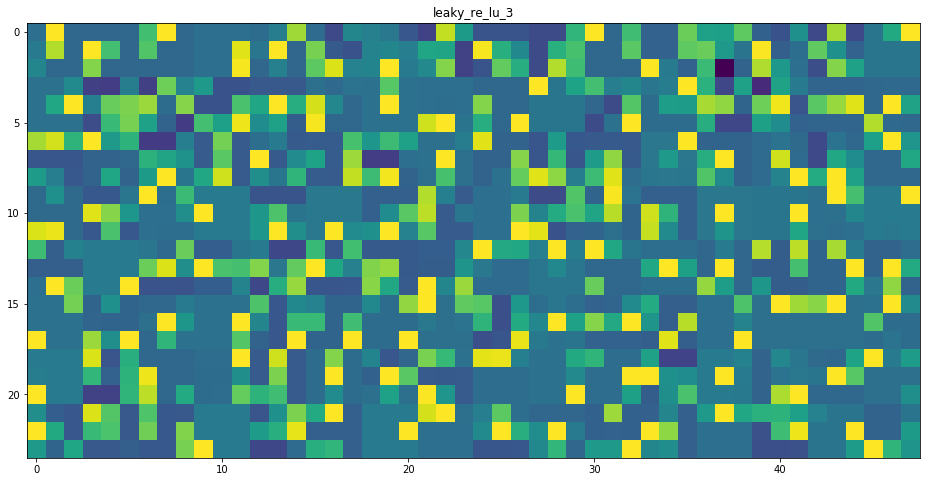

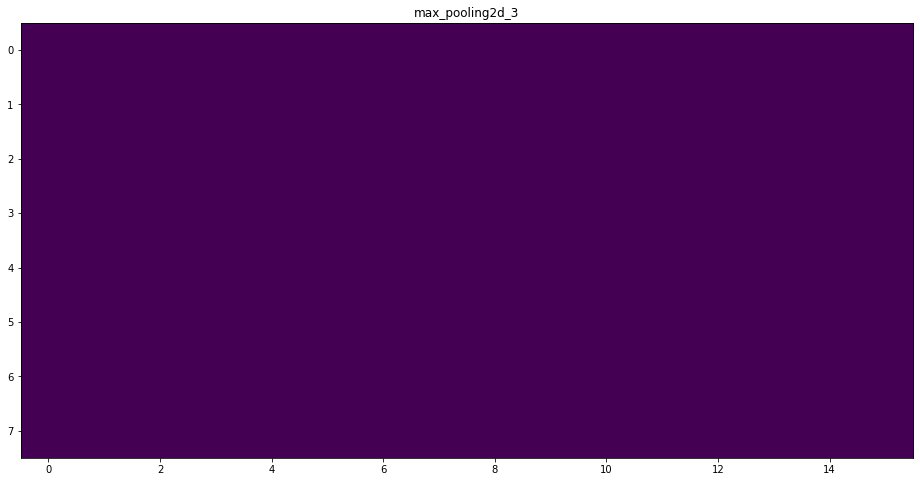

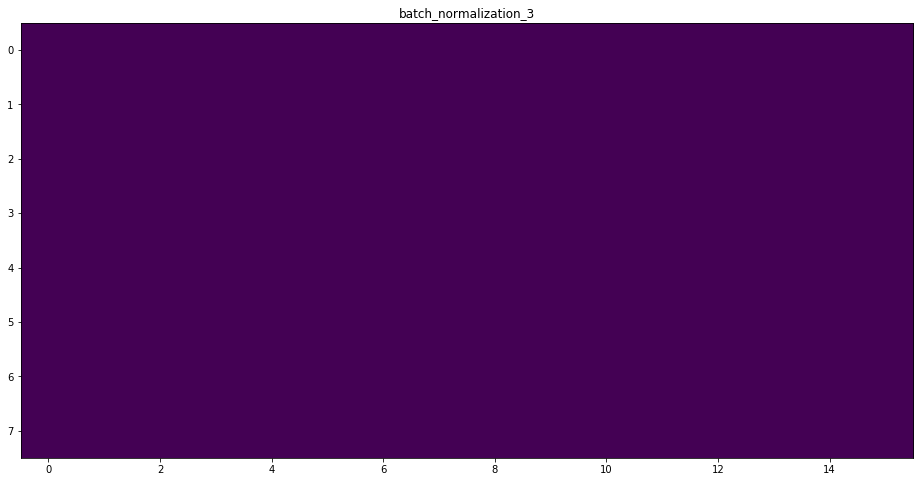

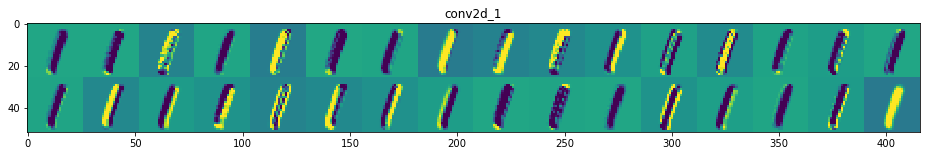

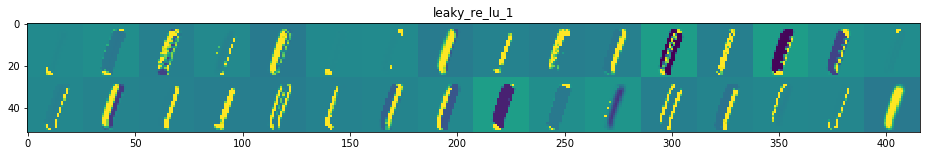

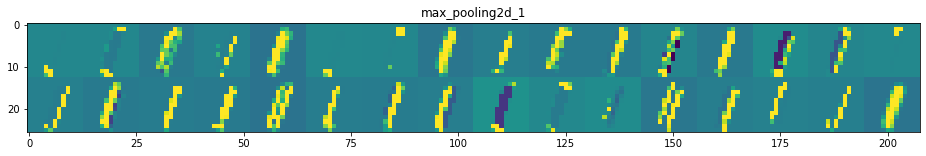

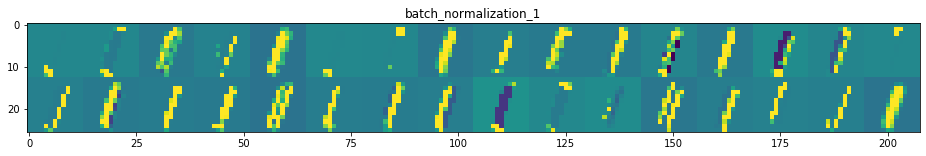

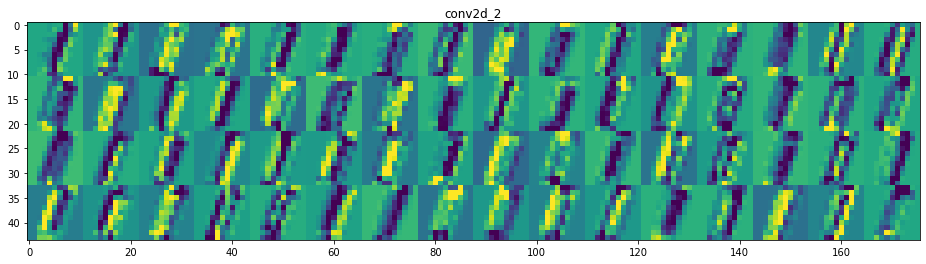

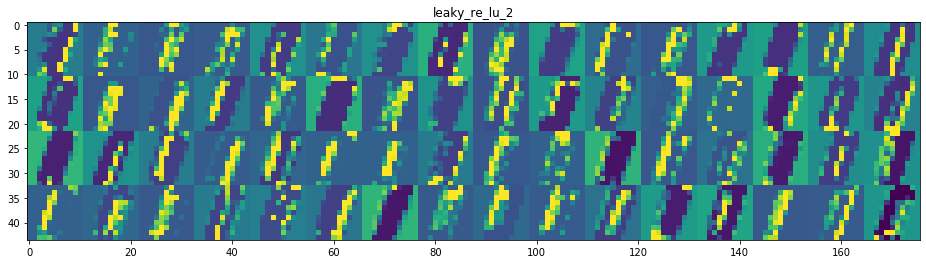

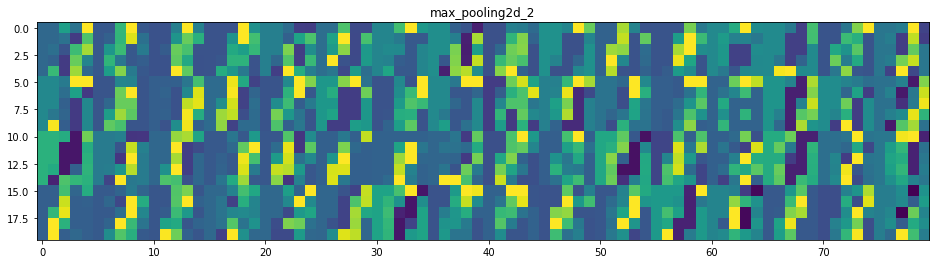

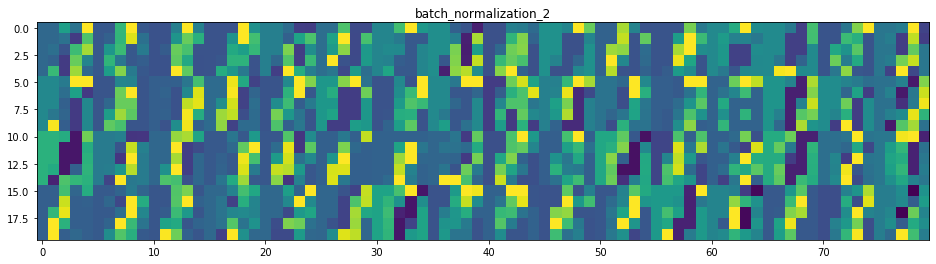

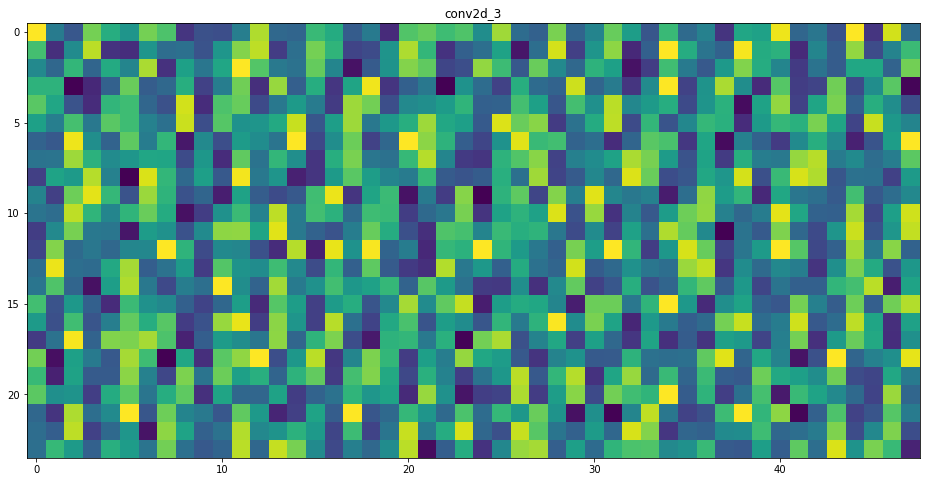

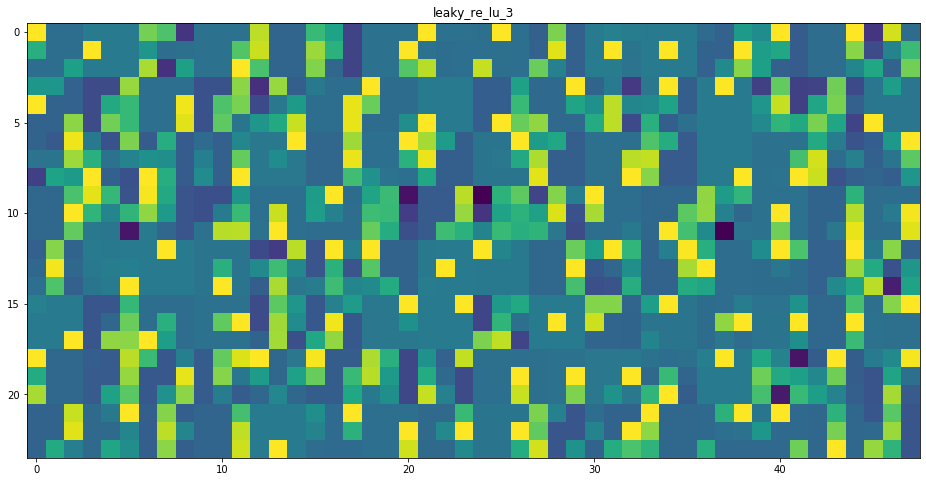

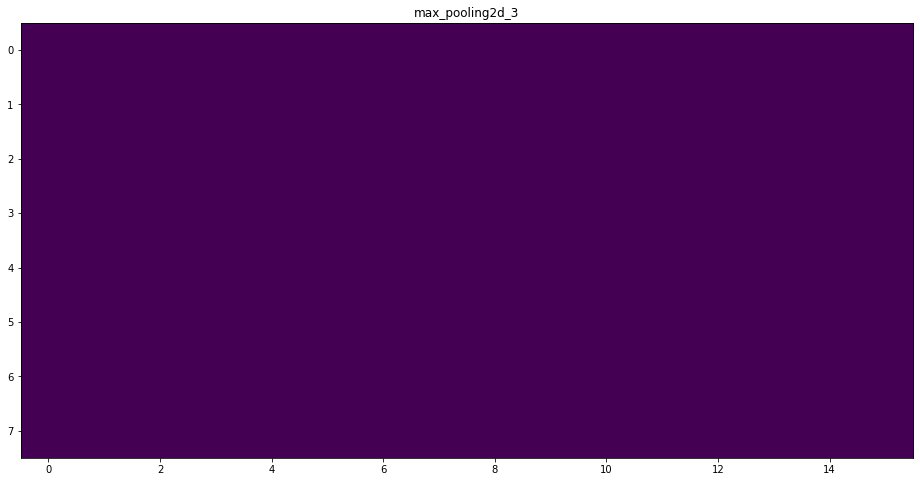

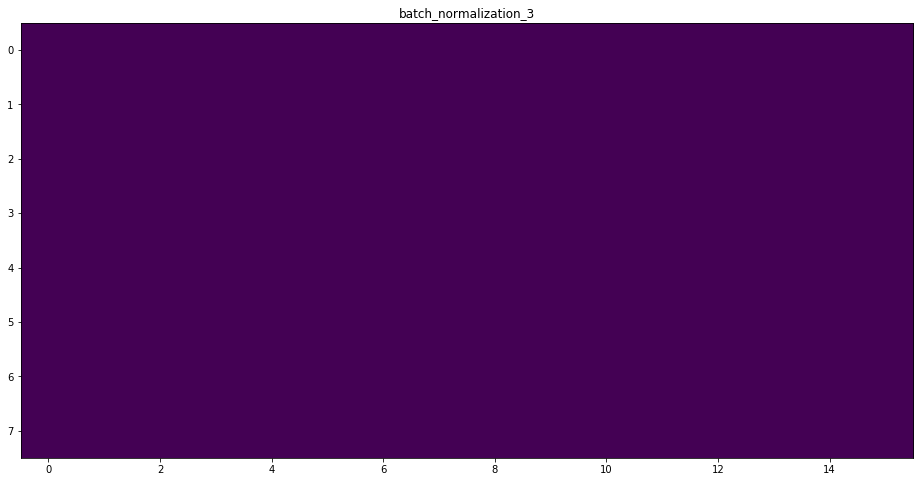

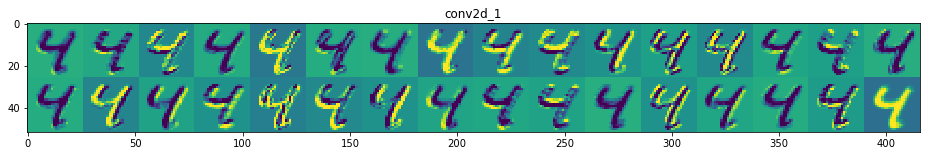

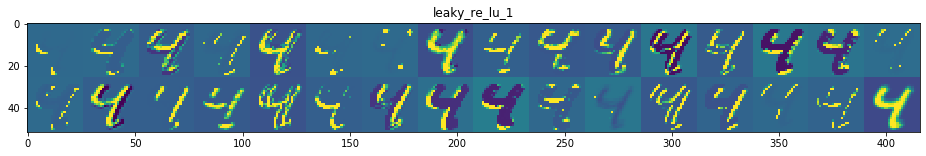

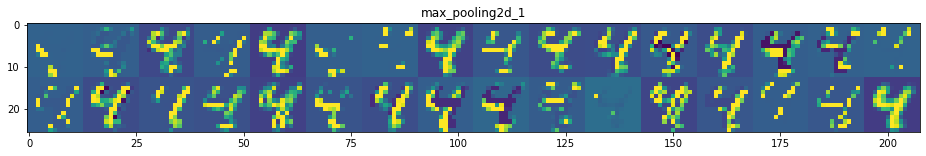

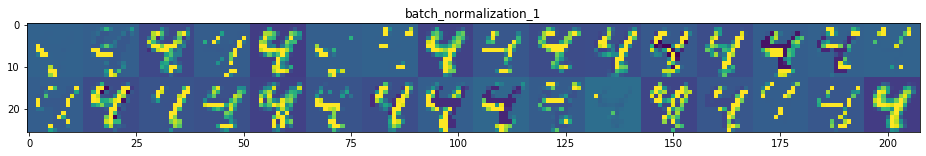

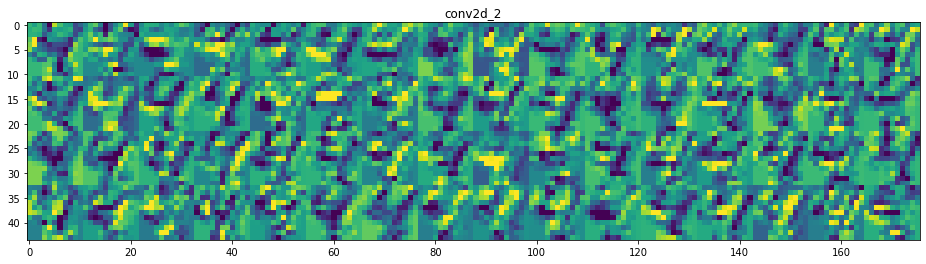

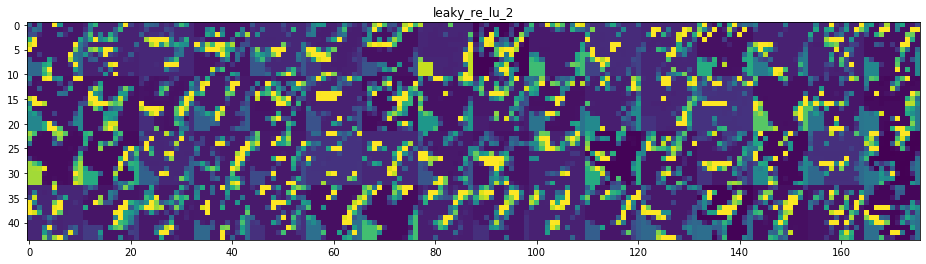

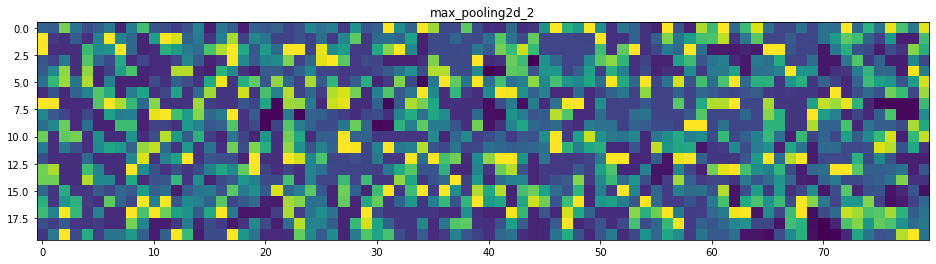

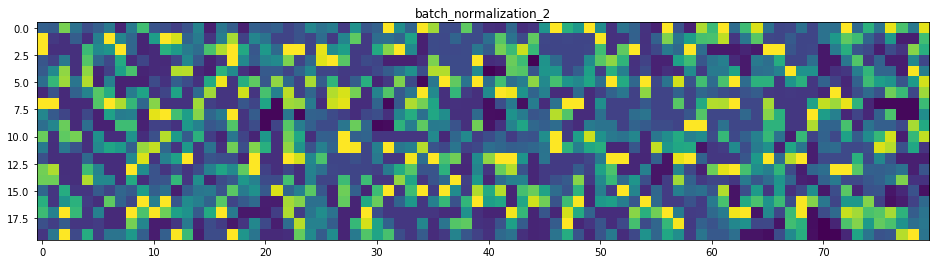

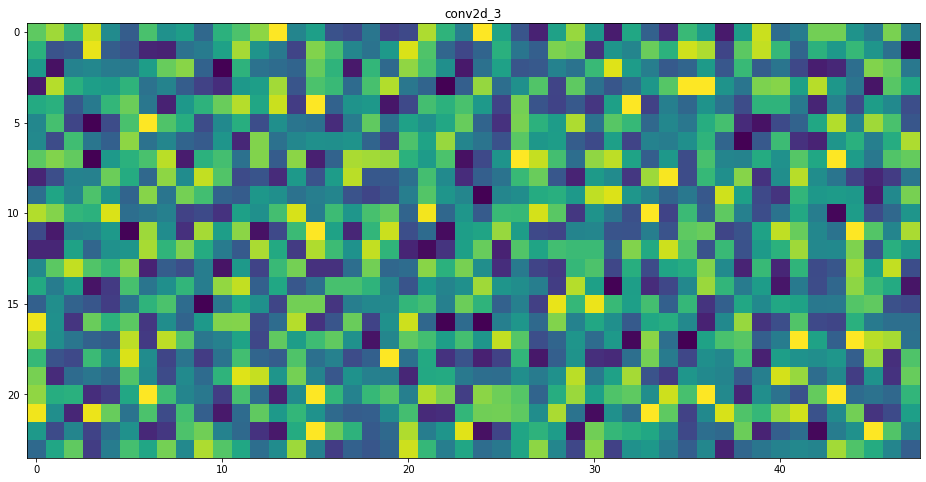

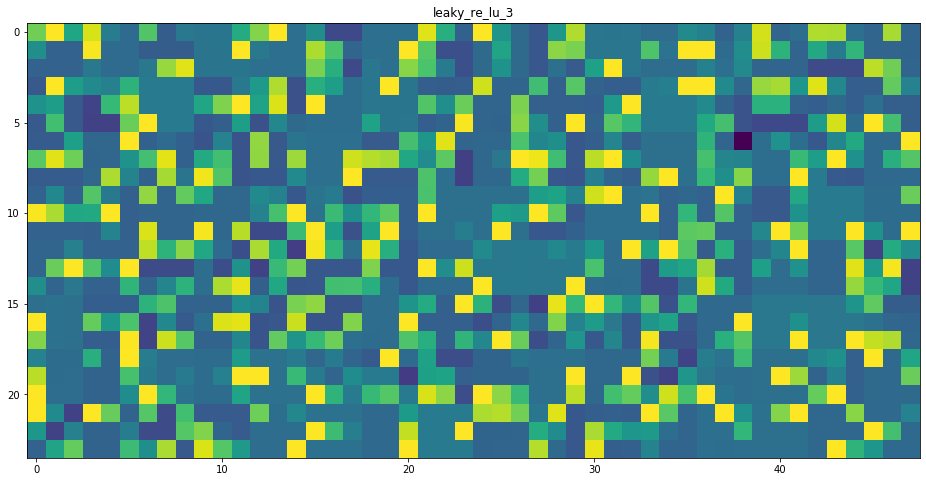

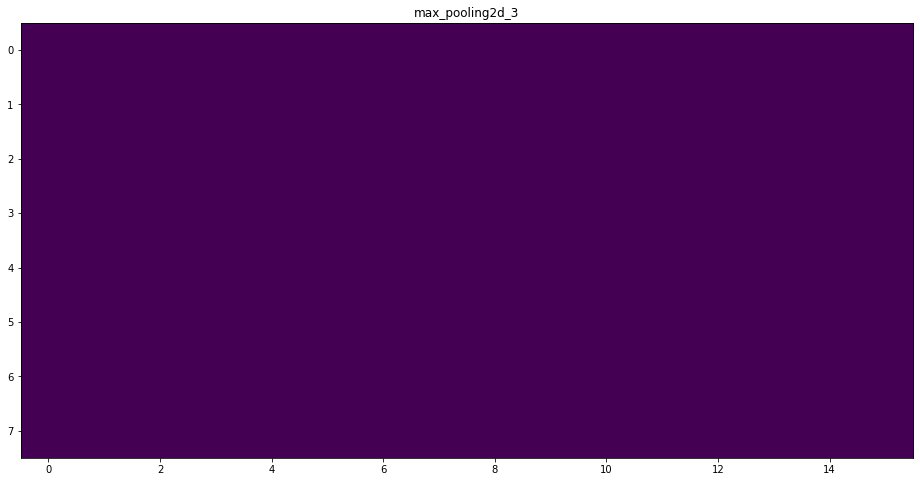

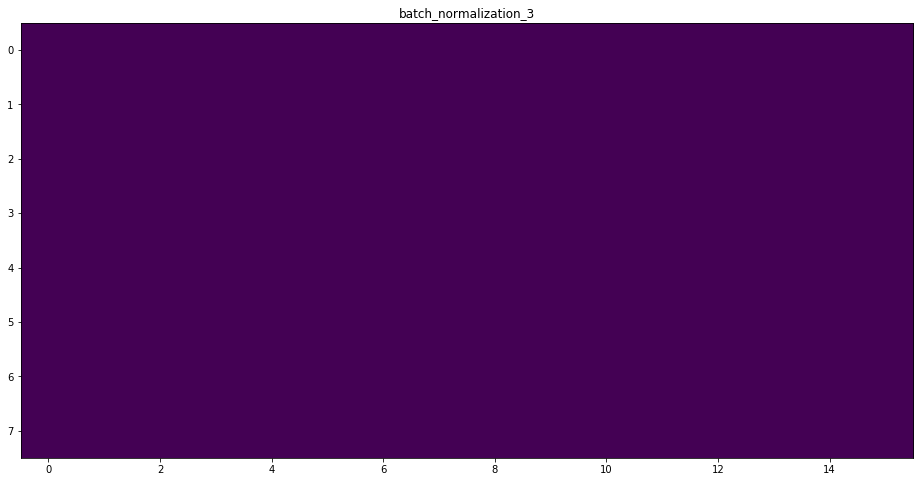

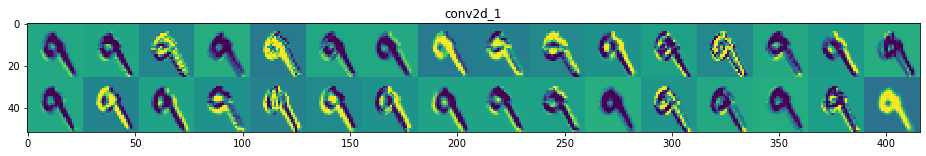

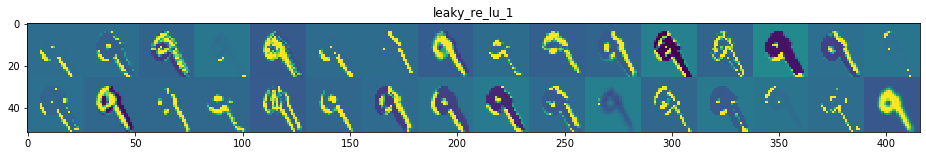

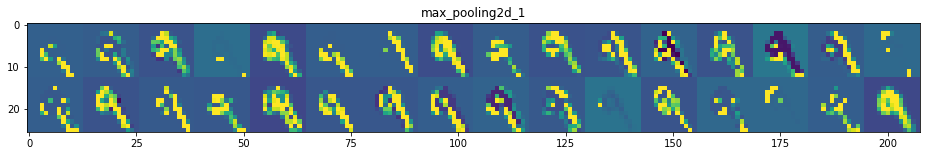

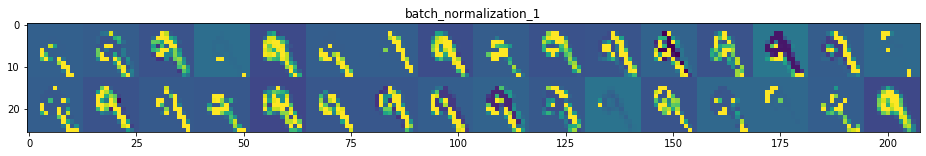

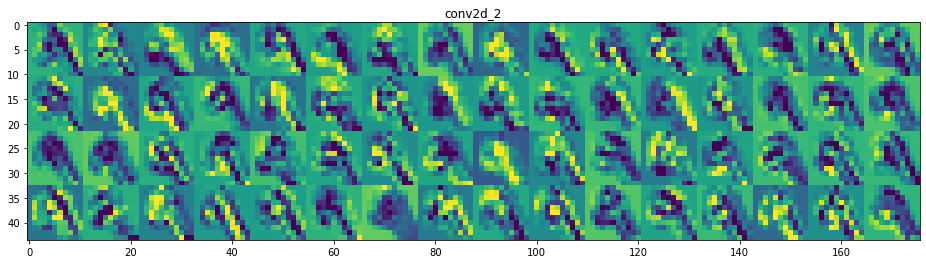

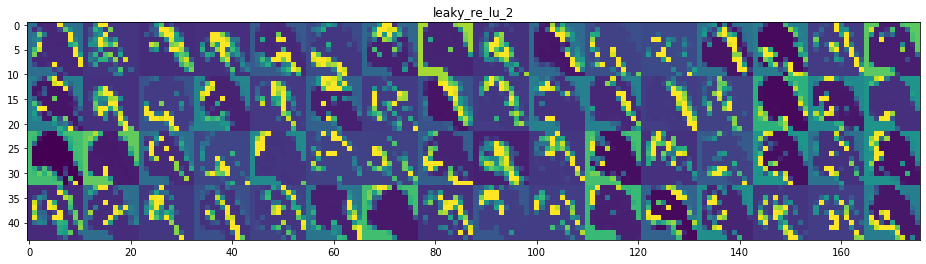

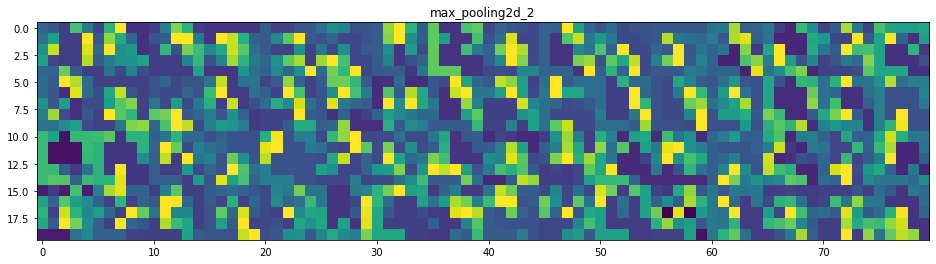

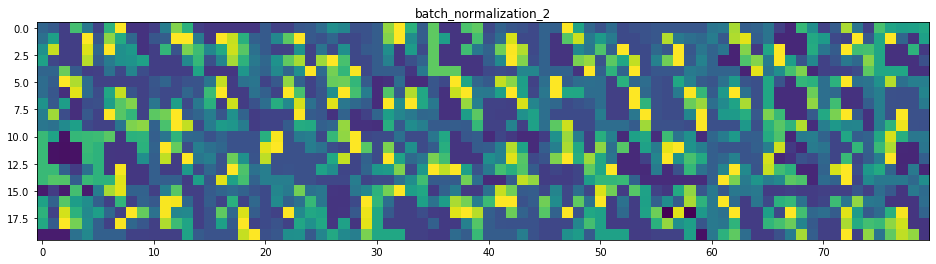

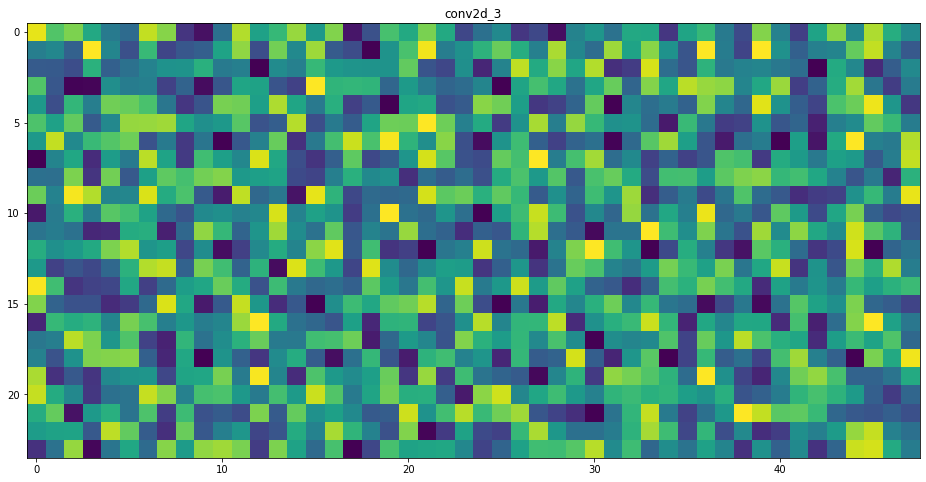

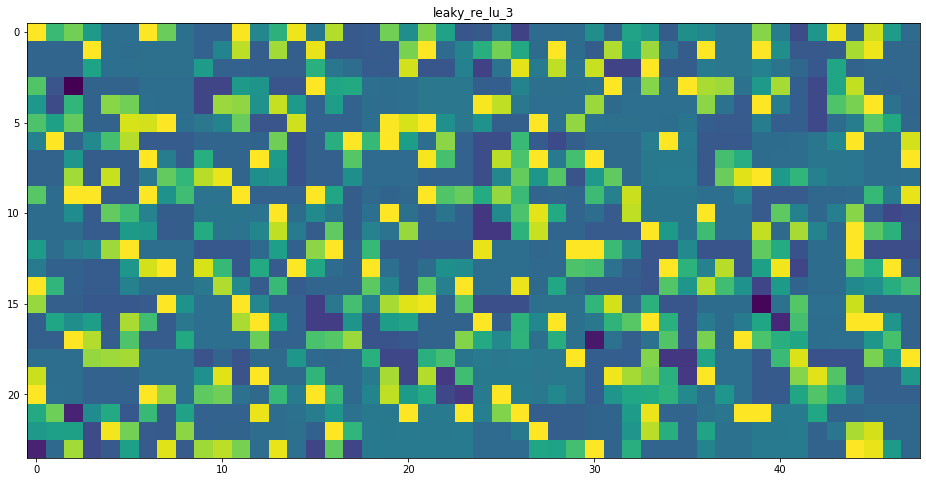

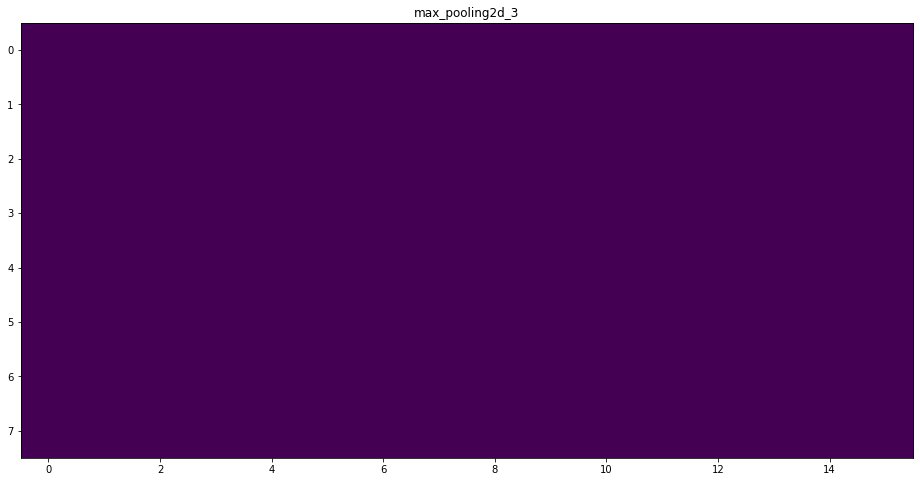

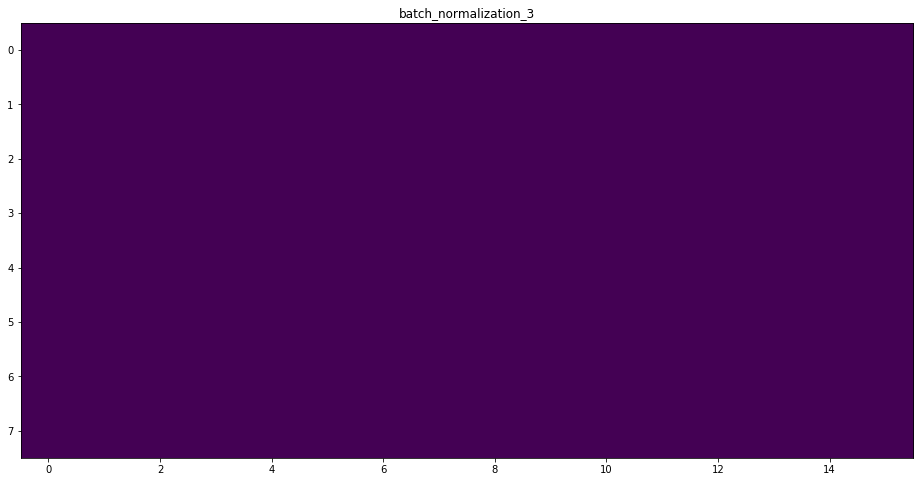

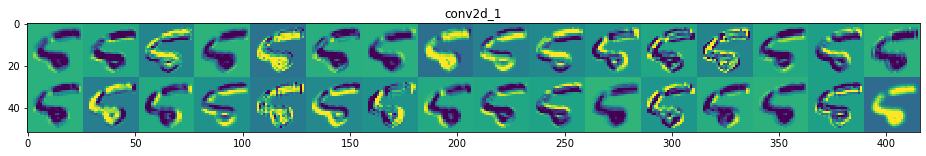

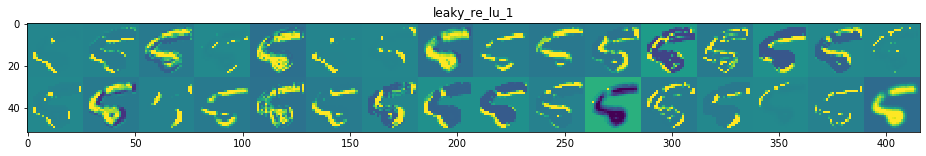

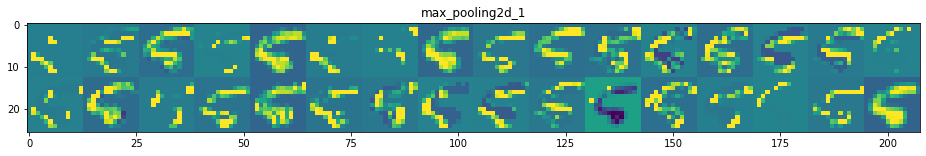

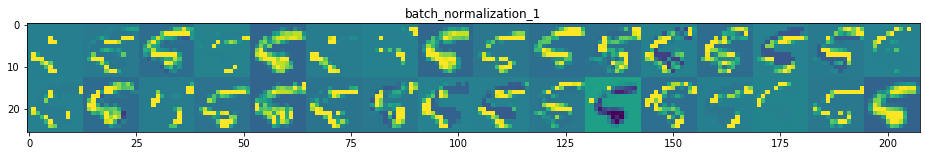

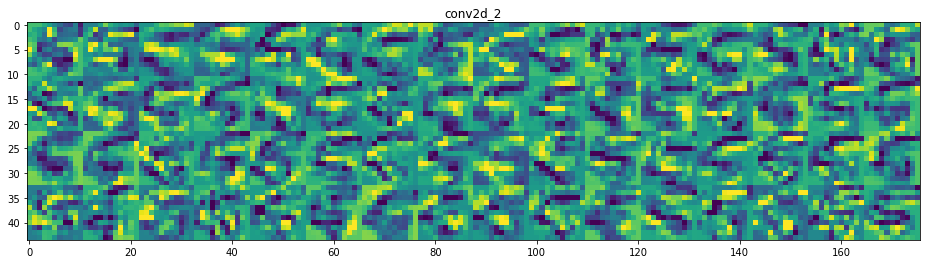

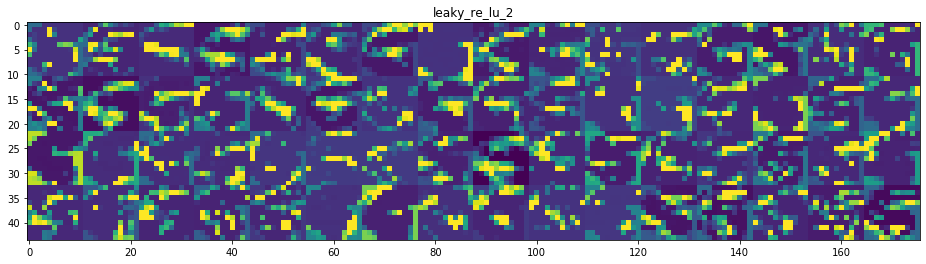

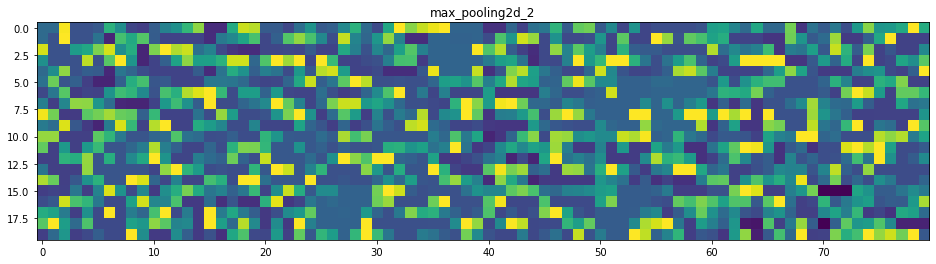

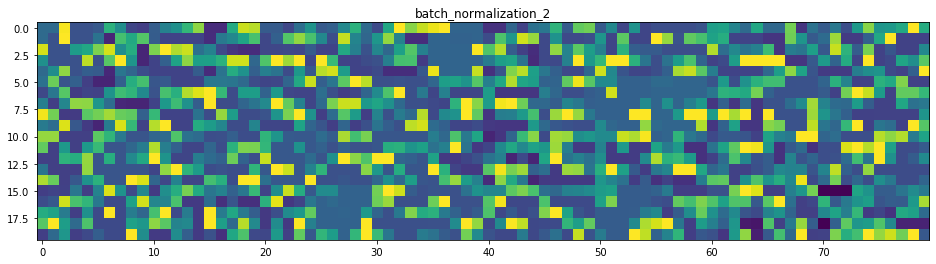

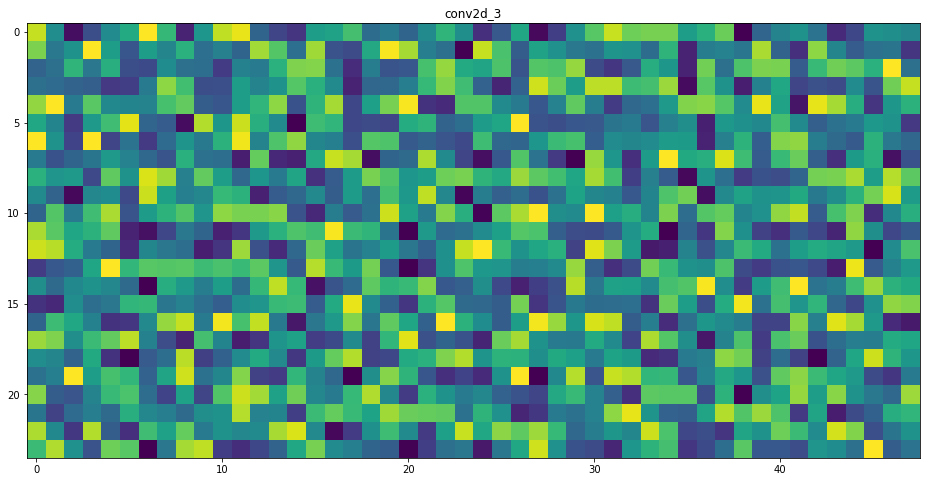

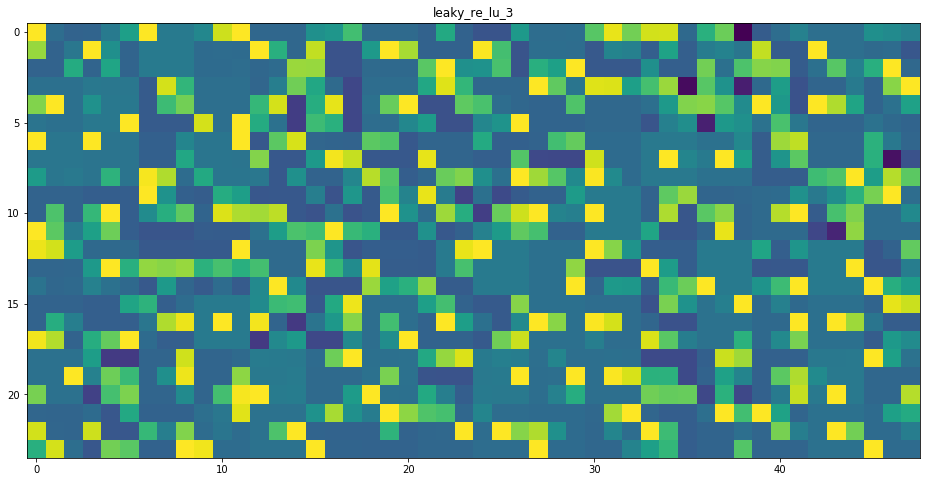

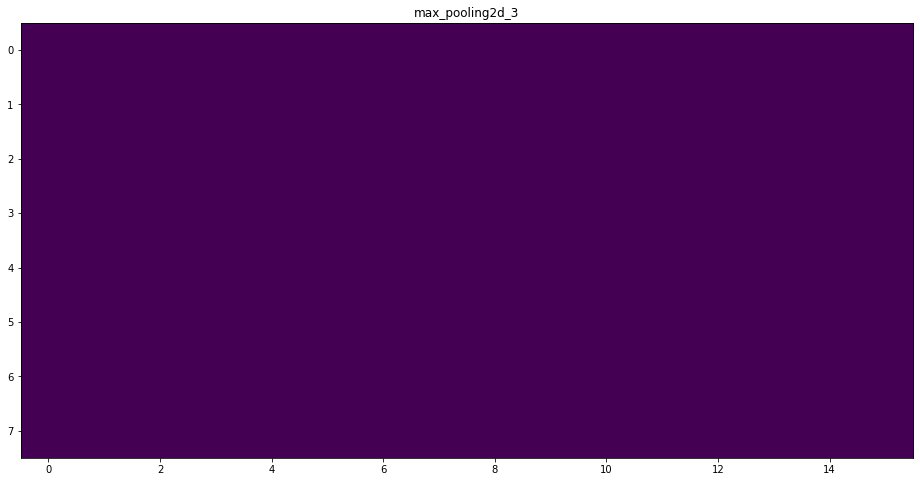

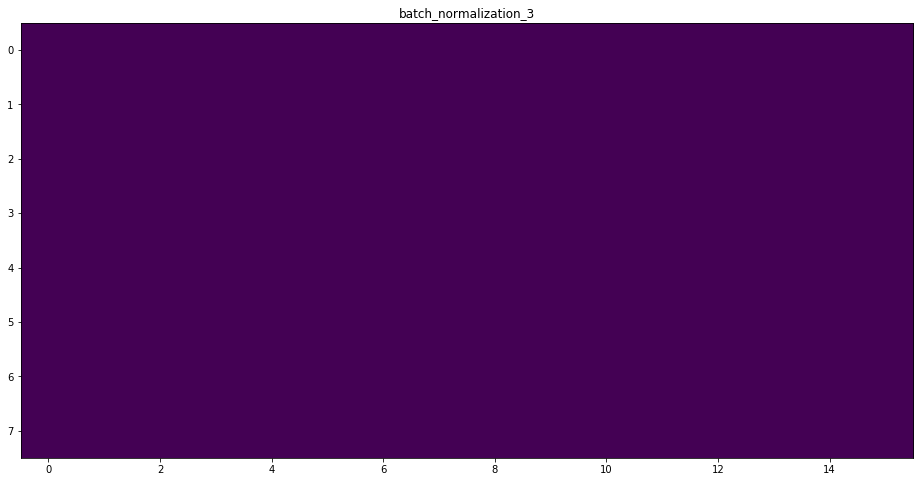

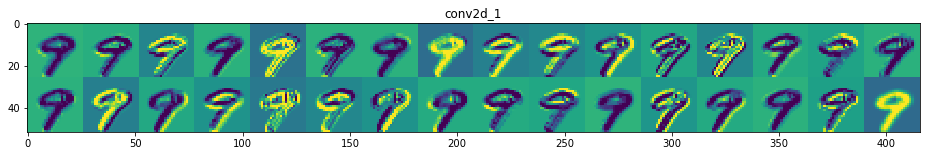

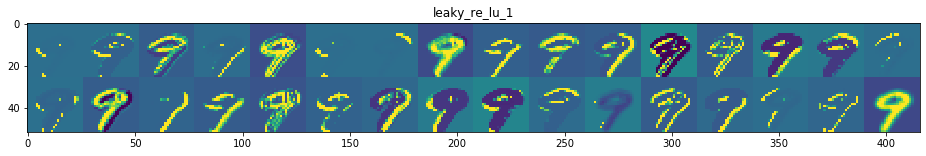

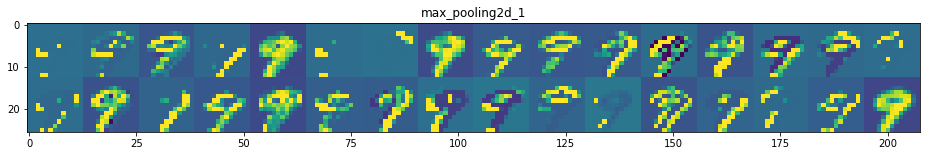

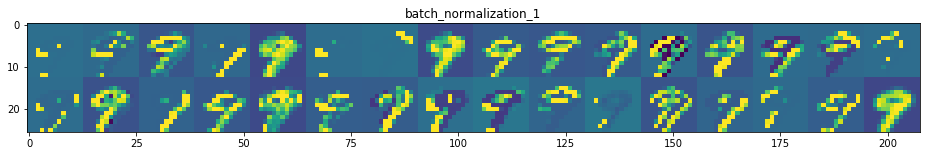

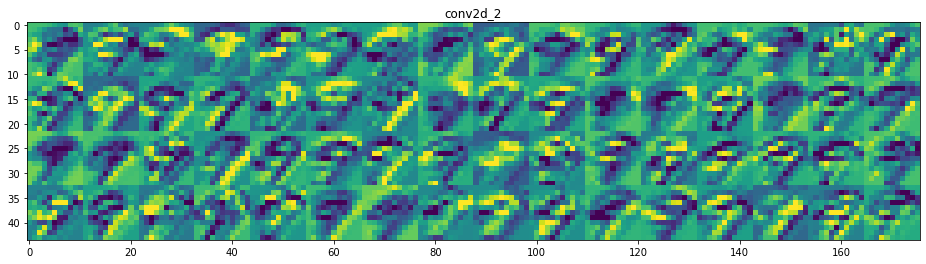

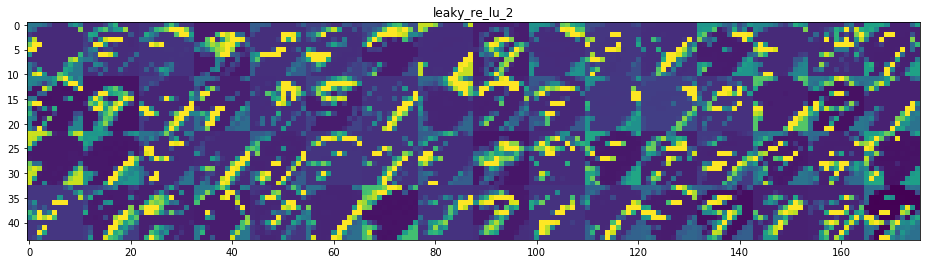

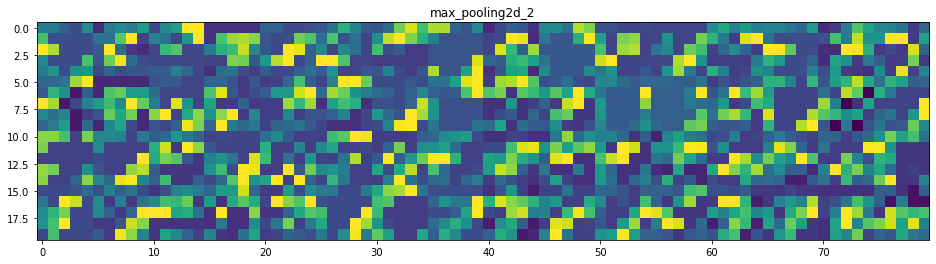

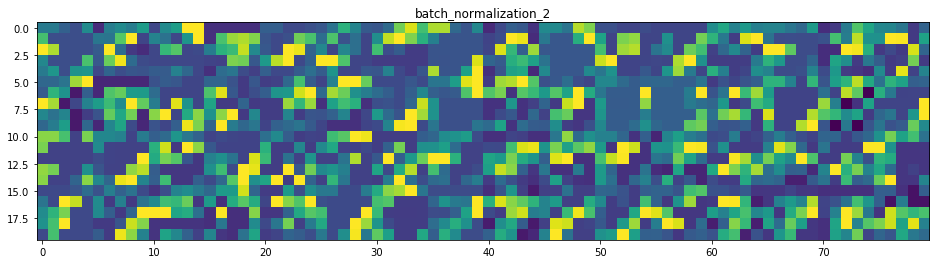

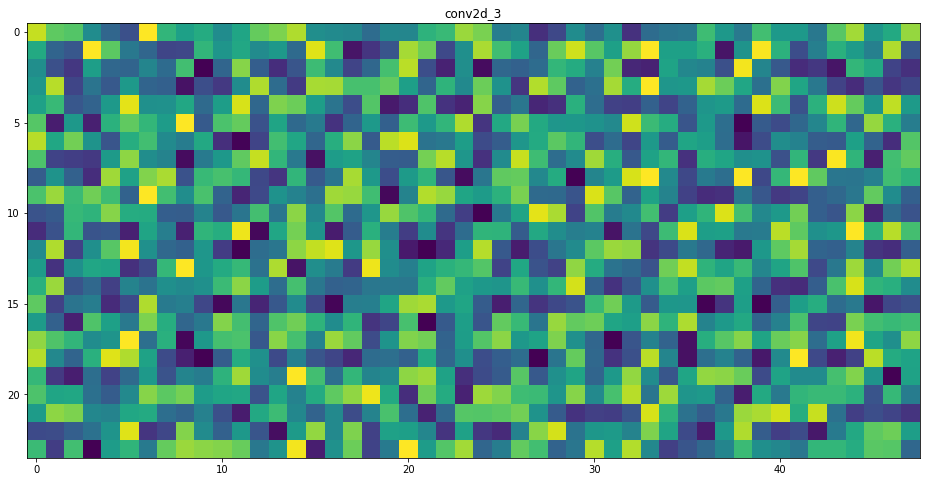

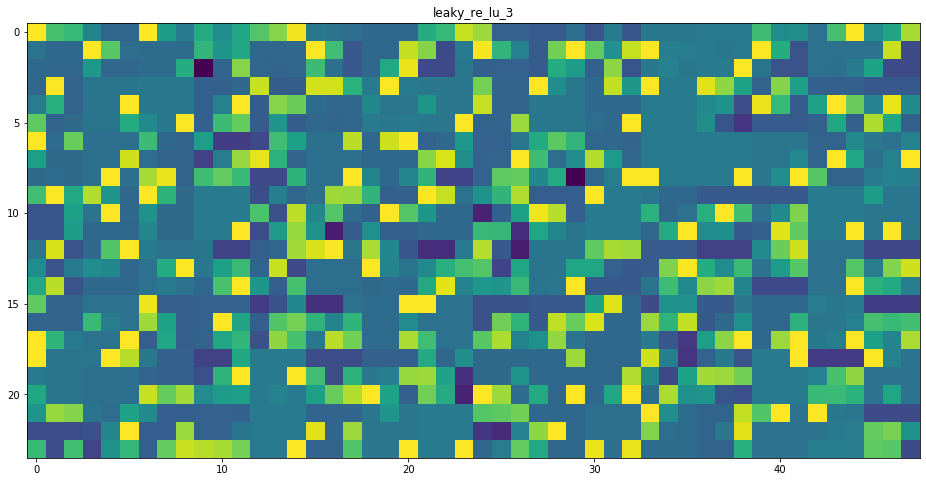

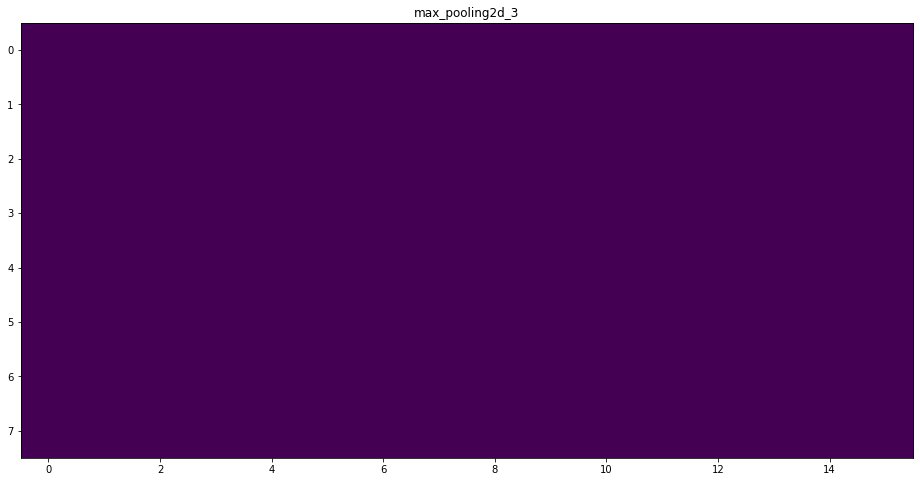

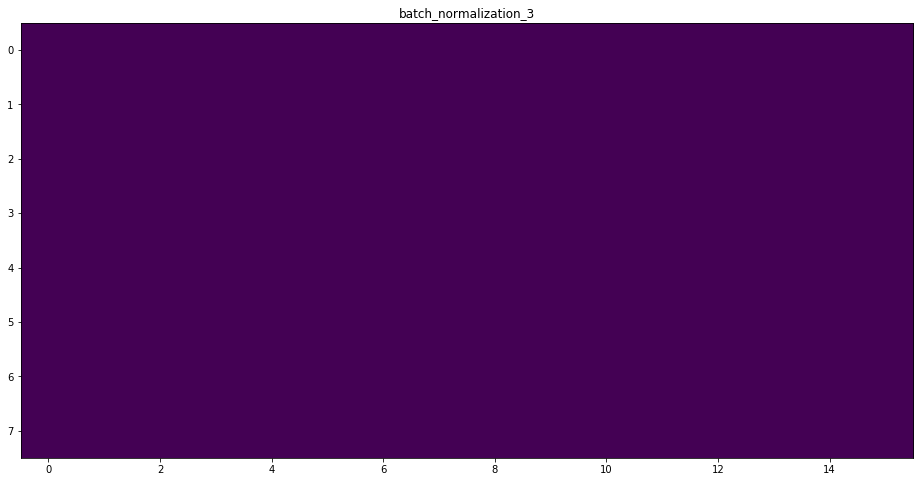

In [27]:
for i in range(10):
    img = np.expand_dims(x_test[i],axis=0)
    vis(img)